In [1]:
import graphviz
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics, tree
from imblearn.over_sampling import SMOTE #For over sampling
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_classif # Library to compute information gain
from collections import Counter
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier #Used everywhere.
from sklearn.metrics import matthews_corrcoef #MCC  used everywhere

sns.set_theme(color_codes=True)

In [2]:
# data = pd.read_excel(r"./geotechnical data.xlsx")
df = pd.read_excel(r"./data/complete_data.xlsx")
df.head()

,Borehole ID,Depth From (m),Depth to (m),Run Length (m),True Thickness (m),Weathering,Hardness,Geotech Domain,Jn Description,Jr Description,...,Density,Virgin Stress,UCS Mpa,UCS/Virgin stress ratio,SRF,Q Value,LNQ,RMR,ESR VALUE,Maximum unsupported span
0,SEDD71,0.00,5.65,5.65,4.51,5.0,1.0,Weathered,Intact no or few joints,rough and discontinous,...,27000.0,3.173143,50.0,15.75725,10.0,0.000000,NaN,NaN,4.0,0.000000
1,SEDD71,5.65,7.60,1.95,6.07,4.0,1.0,Weathered,one joint set,rough and undulating,...,27000.0,3.173143,50.0,15.75725,5.0,NaN,NaN,NaN,1.6,NaN
2,SEDD71,7.60,9.42,1.82,7.52,4.0,1.0,Weathered,one joint set plus random joints,rough and planar,...,27000.0,3.173143,50.0,15.75725,2.5,NaN,NaN,NaN,1.3,NaN
3,SEDD71,9.42,10.60,1.18,8.47,3.0,3.0,Weathered,two joint set,smooth and discountinous,...,27000.0,3.173143,50.0,15.75725,7.5,0.452212,-0.793604,36.85756,1.0,1.456018
4,SEDD71,10.47,11.40,0.93,9.10,4.0,1.0,Weathered,two joint set plus random joints,smooth and undulating,...,27000.0,3.173143,50.0,15.75725,5.0,0.000000,NaN,NaN,0.8,0.000000


In [3]:
df.columns

Index(['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Borehole ID               597 non-null    object 
 1   Depth From (m)            597 non-null    float64
 2   Depth to (m)              597 non-null    float64
 3   Run Length (m)            597 non-null    float64
 4   True Thickness (m)        597 non-null    float64
 5   Weathering                597 non-null    float64
 6   Hardness                  597 non-null    float64
 7   Geotech Domain            597 non-null    object 
 8   Jn Description            679 non-null    object 
 9   Jr Description            598 non-null    object 
 10  Ja Description            641 non-null    object 
 11  Jw Description            679 non-null    object 
 12  ESR Conditions            600 non-null    object 
 13  Depth underground (m)     597 non-null    float64
 14  RQD m     

In [5]:
df.isnull().sum()

Borehole ID                  82
Depth From (m)               82
Depth to (m)                 82
Run Length (m)               82
True Thickness (m)           82
Weathering                   82
Hardness                     82
Geotech Domain               82
Jn Description                0
Jr Description               81
Ja Description               38
Jw Description                0
ESR Conditions               79
Depth underground (m)        82
RQD m                        82
RQD %                        82
Jn                            0
Jr                           81
Ja                           44
Jw                            0
Density                      82
Virgin Stress                82
UCS Mpa                      82
UCS/Virgin stress ratio      82
SRF                          57
Q Value                      89
LNQ                         174
RMR                         174
ESR VALUE                    79
Maximum unsupported span     89
dtype: int64

In [6]:
data1 = df.dropna()
data1.isnull().sum()

Borehole ID                 0
Depth From (m)              0
Depth to (m)                0
Run Length (m)              0
True Thickness (m)          0
Weathering                  0
Hardness                    0
Geotech Domain              0
Jn Description              0
Jr Description              0
Ja Description              0
Jw Description              0
ESR Conditions              0
Depth underground (m)       0
RQD m                       0
RQD %                       0
Jn                          0
Jr                          0
Ja                          0
Jw                          0
Density                     0
Virgin Stress               0
UCS Mpa                     0
UCS/Virgin stress ratio     0
SRF                         0
Q Value                     0
LNQ                         0
RMR                         0
ESR VALUE                   0
Maximum unsupported span    0
dtype: int64

In [7]:
drop_col = ["Jn Description", "Jr Description", 'Ja Description', 'Jw Description']
data = data1.drop(drop_col, axis=1)
data.head()

,Borehole ID,Depth From (m),Depth to (m),Run Length (m),True Thickness (m),Weathering,Hardness,Geotech Domain,ESR Conditions,Depth underground (m),...,Density,Virgin Stress,UCS Mpa,UCS/Virgin stress ratio,SRF,Q Value,LNQ,RMR,ESR VALUE,Maximum unsupported span
3,SEDD71,9.42,10.6,1.18,8.47,3.0,3.0,Weathered,Power stations major road and railway tunnels ...,11.98,...,27000.0,3.173143,50.0,15.757250,7.5,0.452212,-0.793604,36.857560,1.0,1.456018
6,SEDD71,12.50,14.0,1.50,11.18,3.0,2.0,Weathered,Permanent mine openings water tunnels for hydr...,11.98,...,27000.0,3.173143,50.0,15.757250,5.0,0.069333,-2.668829,19.980535,1.6,1.100340
7,SEDD71,14.00,15.0,1.00,11.98,3.0,3.0,Weathered,Storage rooms water treatment plants minor roa...,11.98,...,27000.0,3.173143,50.0,15.757250,7.5,0.002000,-6.214608,-11.931473,1.3,0.216464
8,SEDD71,15.00,16.6,1.60,13.26,2.0,3.0,Transitional,Power stations major road and railway tunnels ...,9.72,...,27000.0,2.574536,135.0,52.436625,1.0,0.000564,-7.480038,-23.320340,1.0,0.100372
9,SEDD71,16.60,18.1,1.50,14.46,2.0,3.0,Transitional,Underground nuclear power stations railway sta...,9.72,...,27000.0,2.574536,135.0,52.436625,1.0,2.518519,0.923671,52.313038,0.8,2.315144


In [8]:
data.columns

Index(['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

## CATEGORICAL DATA

In [9]:
# categorical values

data.select_dtypes(include="object").nunique()

Borehole ID       11
Geotech Domain     3
ESR Conditions     6
dtype: int64

In [10]:
categorical_values = ["Borehole ID", "Geotech Domain", "ESR Conditions"]

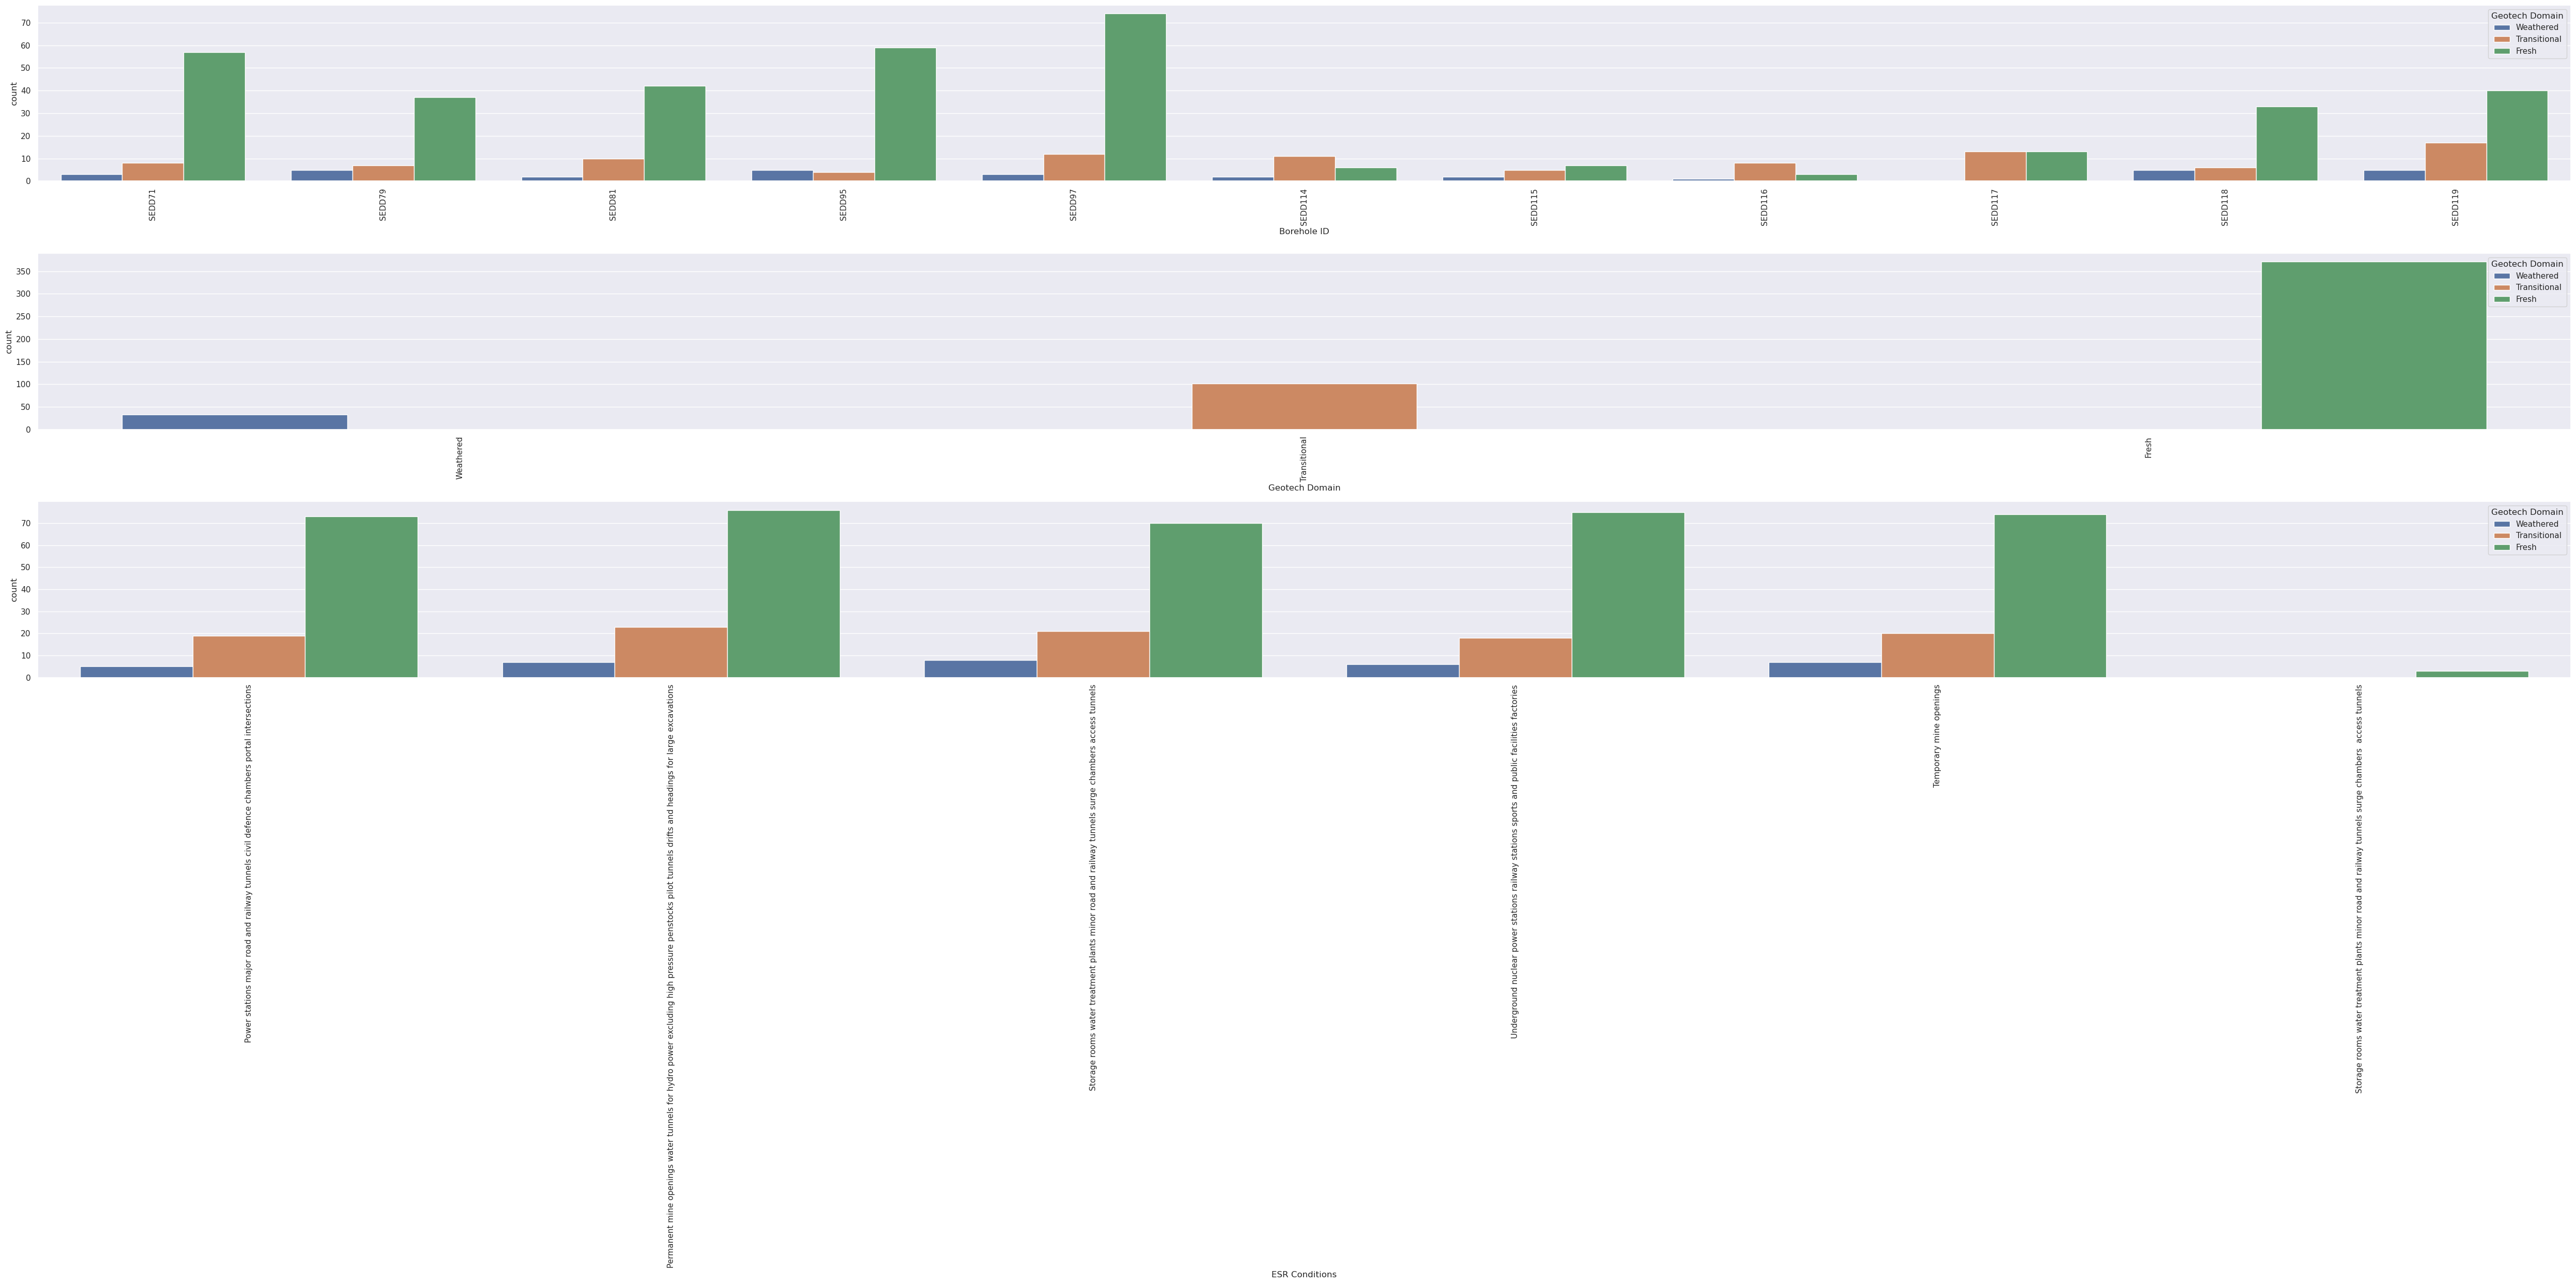

In [11]:
# create figure with subplots
fig, axs = plt.subplots(nrows=len(categorical_values), ncols=1, figsize=(50, 25))
axs = axs.flatten()

# barplots for each categorical value
for i, var in enumerate(categorical_values):
    sns.countplot(x=var, hue="Geotech Domain", data=data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    
# adjust spacing between the subplots
fig.tight_layout()

# show plot
plt.show()

## NUMERICAL DATA

In [12]:
data.describe()

,Depth From (m),Depth to (m),Run Length (m),True Thickness (m),Weathering,Hardness,Depth underground (m),RQD m,RQD %,Jn,...,Density,Virgin Stress,UCS Mpa,UCS/Virgin stress ratio,SRF,Q Value,LNQ,RMR,ESR VALUE,Maximum unsupported span
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,...,505.0,505.000000,505.000000,505.000000,505.000000,5.050000e+02,505.000000,505.000000,505.000000,505.000000
mean,58.618139,60.138040,1.520574,48.028257,1.364356,4.077228,46.759505,0.995465,66.898040,16.069307,...,27000.0,12.385190,160.316337,20.787663,1.140594,2.602045e+00,-1.020304,34.817265,1.747327,3.484370
std,33.116859,33.043969,0.363655,26.390134,0.685679,1.013782,27.049972,0.381339,24.218064,14.462635,...,0.0,7.164726,34.047270,20.950822,0.466417,6.923884e+00,2.952856,26.575707,1.160065,4.312638
min,1.400000,4.160000,0.500000,3.320000,1.000000,1.000000,3.510000,0.100000,3.620000,1.000000,...,27000.0,0.929694,50.000000,7.669871,1.000000,5.687000e-11,-23.590253,-168.312278,0.800000,0.000128
25%,32.500000,34.000000,1.500000,27.150000,1.000000,3.000000,15.770000,0.770000,52.320000,6.000000,...,27000.0,4.177000,135.000000,9.157036,1.000000,1.114667e-01,-2.194030,24.253733,1.000000,1.058438
50%,53.500000,55.000000,1.500000,43.920000,1.000000,4.000000,46.560000,1.040000,70.000000,12.000000,...,27000.0,12.332347,177.250000,14.372771,1.000000,4.101900e-01,-0.891135,35.979787,1.300000,2.166424
75%,80.500000,82.000000,1.500000,65.490000,2.000000,5.000000,73.080000,1.300000,86.670000,24.000000,...,27000.0,19.356700,177.250000,23.772574,1.250000,1.805556e+00,0.590868,49.317815,1.600000,3.844346
max,148.900000,149.900000,3.600000,119.720000,4.000000,5.000000,87.250000,2.350000,100.000000,60.000000,...,27000.0,23.109907,177.250000,190.654191,7.500000,6.551424e+01,4.182268,81.640408,4.000000,35.395629


In [13]:
numerical_variables = ['Depth From (m)','Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'RQD m', 'RQD %', 'Weathering', 'Hardness']

In [14]:
data['RQD m']

3      0.49
6      0.78
7      0.60
8      1.30
9      0.68
       ... 
592    1.05
593    1.37
594    1.45
595    1.47
596    0.66
Name: RQD m, Length: 505, dtype: float64

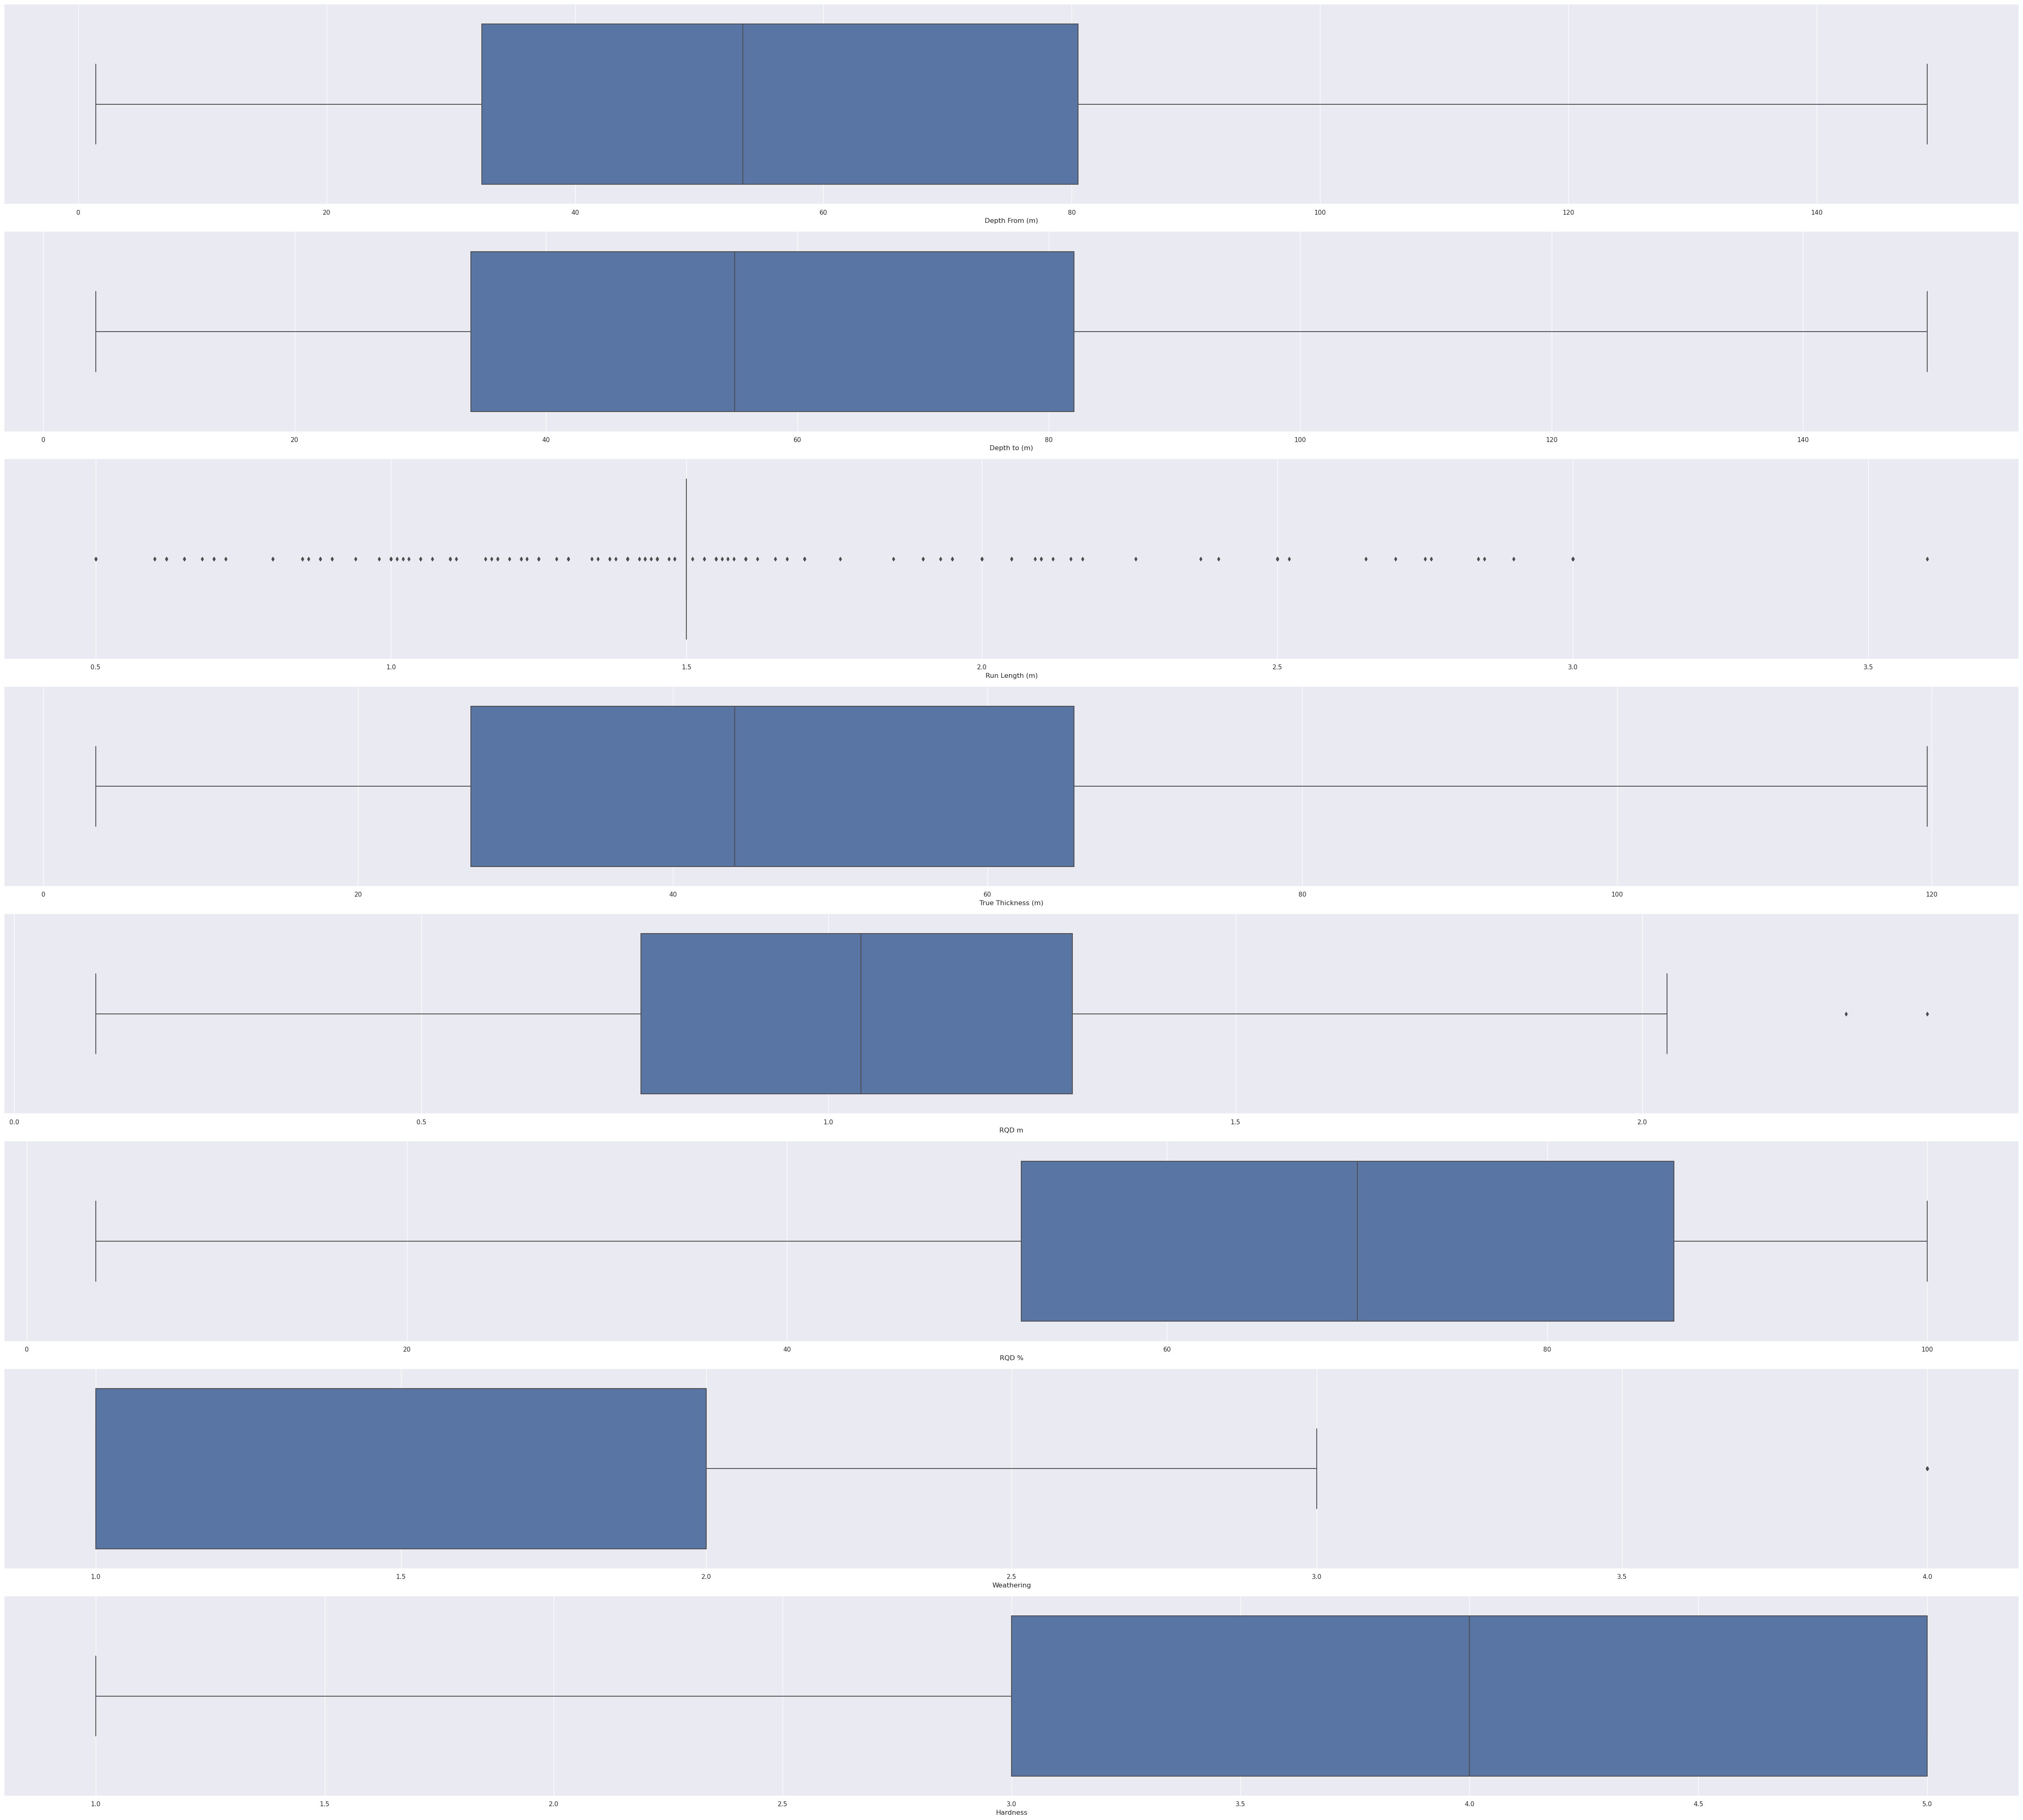

In [15]:
fig, axs = plt.subplots(nrows=len(numerical_variables), ncols=1, figsize=(50,45))
axs = axs.flatten()

for i, var in enumerate(numerical_variables):
    sns.boxplot(x=var, data=data, ax=axs[i])

fig.tight_layout()

plt.show()

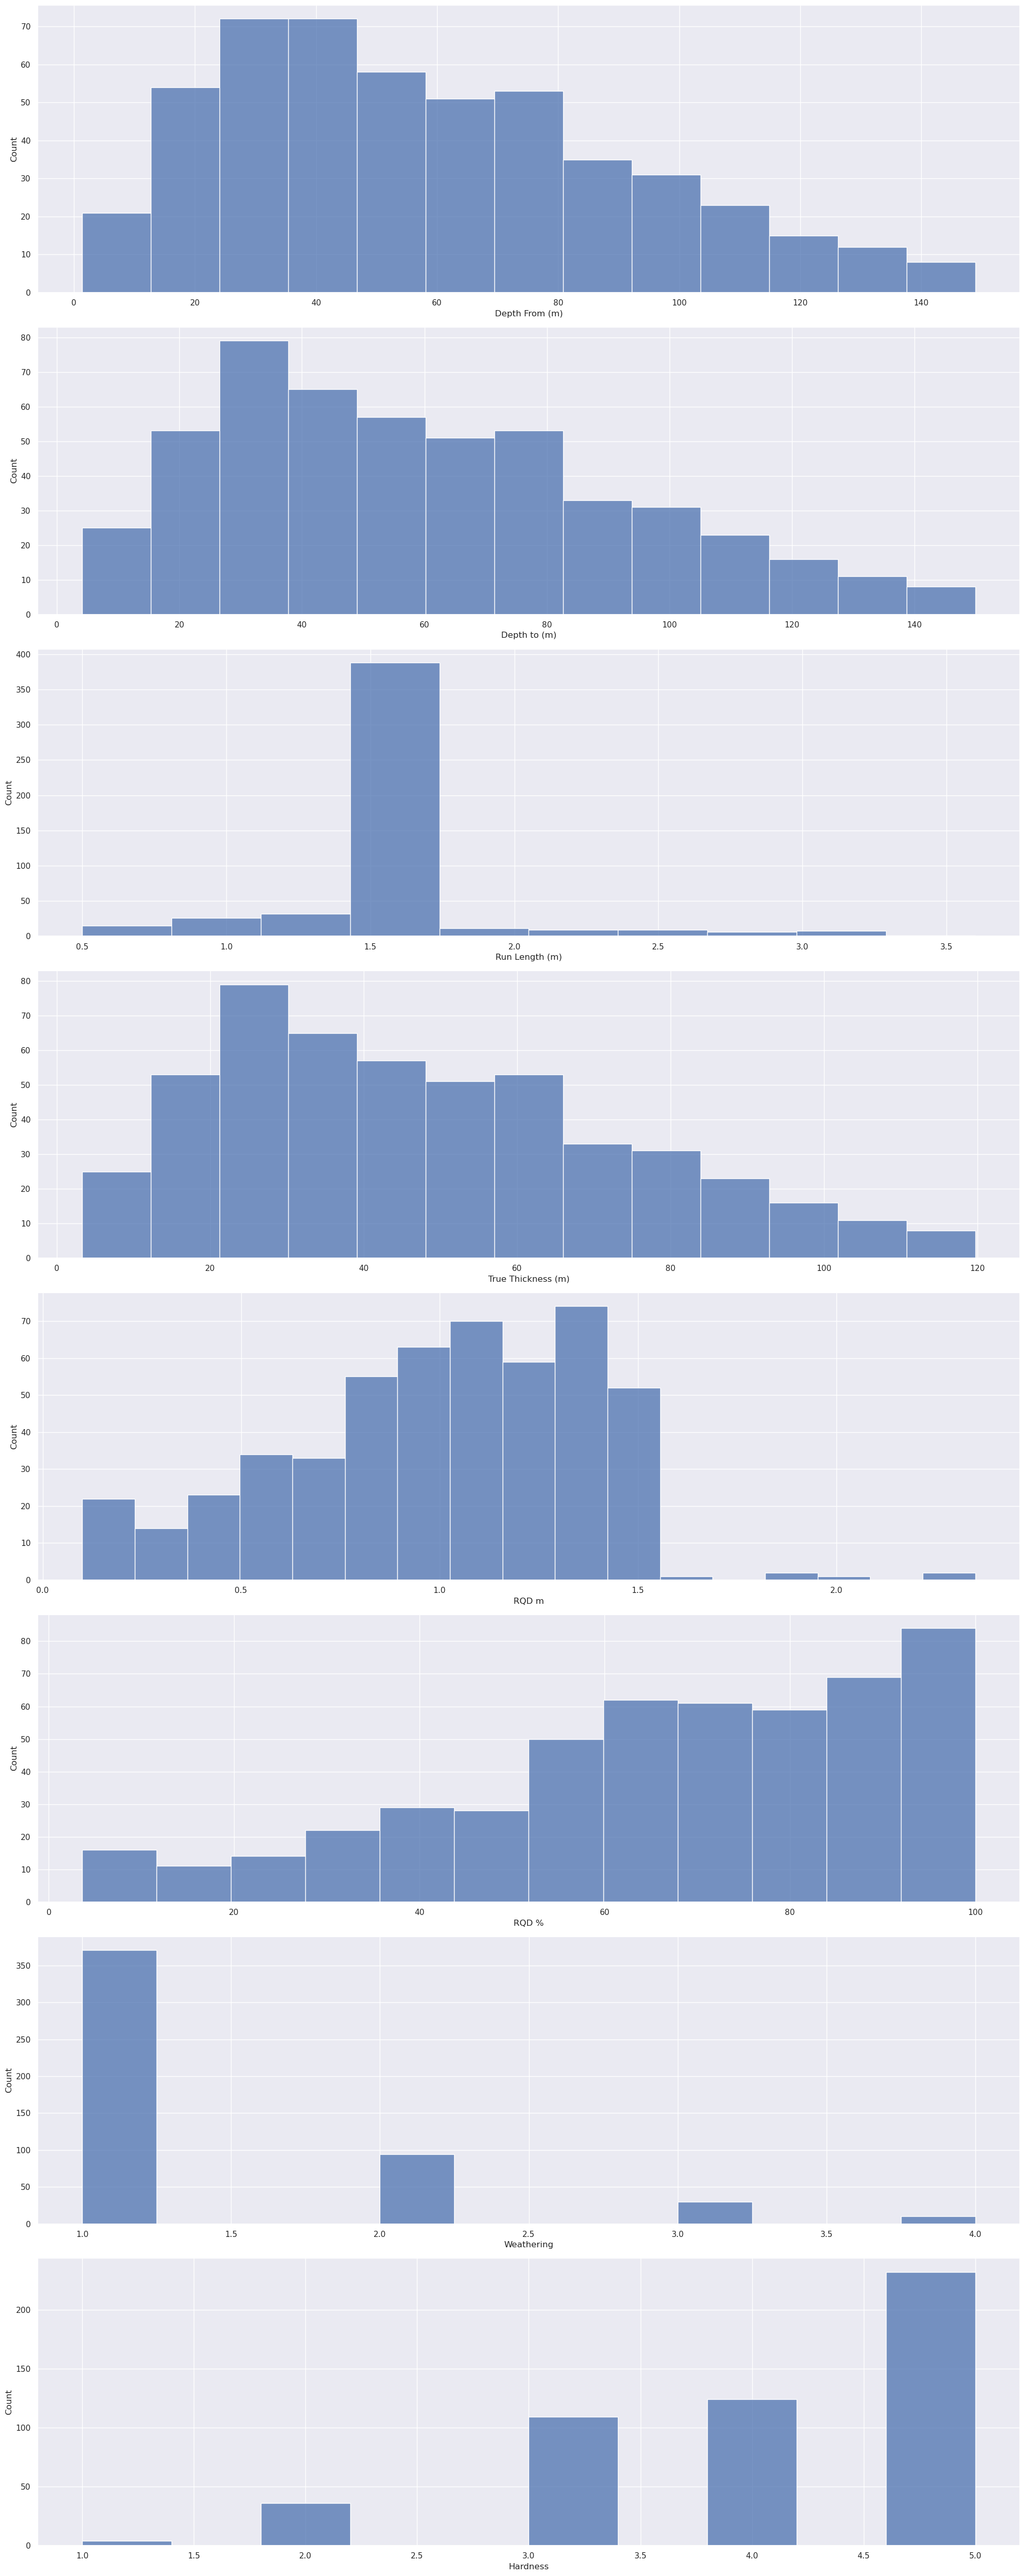

In [16]:
fig, axs = plt.subplots(nrows=len(numerical_variables), ncols=1, figsize=(20, 50))
axs = axs.flatten()

for i, var in enumerate(numerical_variables):
    sns.histplot(x=var, data=data, ax=axs[i])

fig.tight_layout()

plt.show()

# Data preprocessing

In [17]:
data.shape

(505, 26)

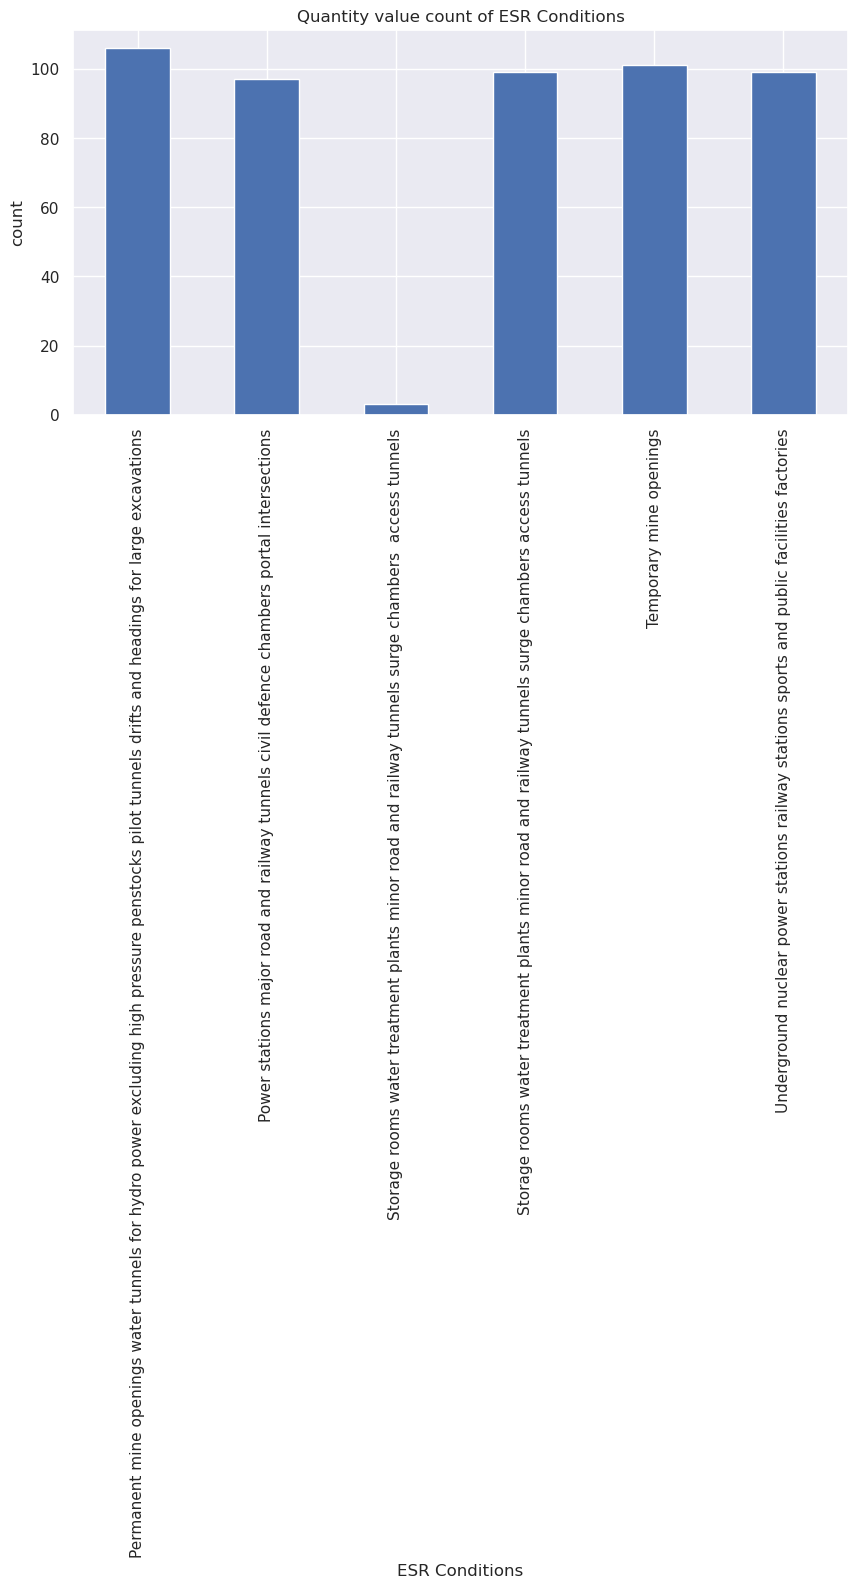

In [18]:
ax = data['ESR Conditions'].value_counts().sort_index()
ax.plot(kind='bar',
          title='Quantity value count of ESR Conditions',
        xlabel='ESR Conditions',
        ylabel='count',
          figsize=(10, 5))
# print("Quantity value count: \n", ax)
plt.show()

Quantity value count: 
 Fresh           371
Transitional    101
Weathered        33
Name: Geotech Domain, dtype: int64


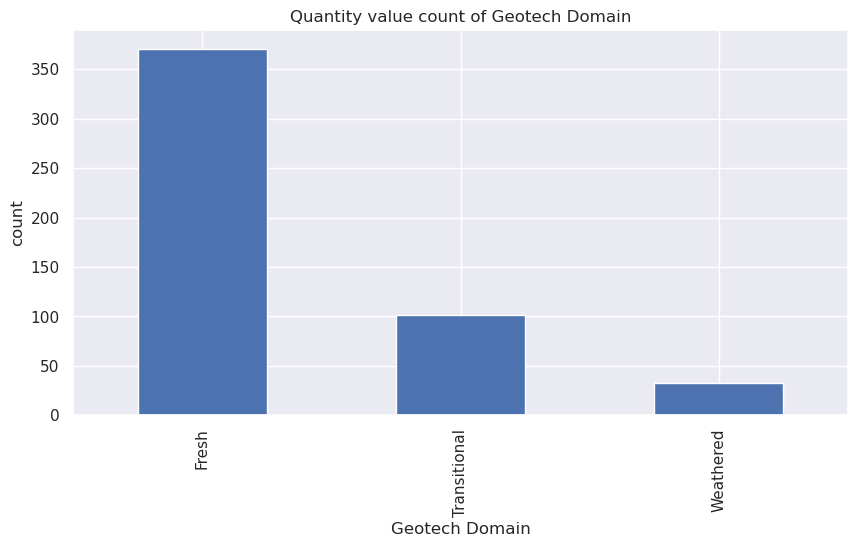

In [19]:
ax = data['Geotech Domain'].value_counts().sort_index()
ax.plot(kind='bar',
          title='Quantity value count of Geotech Domain',
        xlabel='Geotech Domain',
        ylabel='count',
          figsize=(10, 5))
print("Quantity value count: \n", ax)
plt.show()

Quantity value count: 
 SEDD114    19
SEDD115    14
SEDD116    12
SEDD117    26
SEDD118    44
SEDD119    62
SEDD71     68
SEDD79     49
SEDD81     54
SEDD95     68
SEDD97     89
Name: Borehole ID, dtype: int64


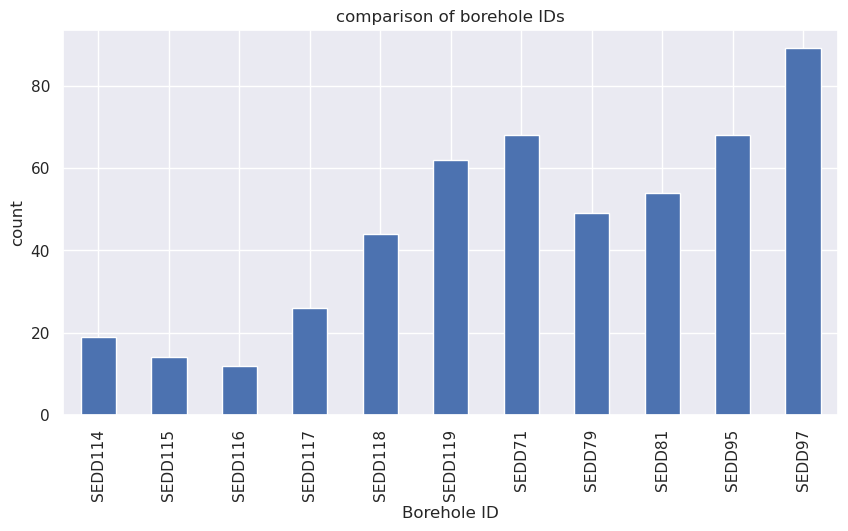

In [20]:
ax = data['Borehole ID'].value_counts().sort_index()
ax.plot(kind='bar',
          title='comparison of borehole IDs',
        xlabel='Borehole ID',
        ylabel='count',
          figsize=(10, 5))
print("Quantity value count: \n", ax)
plt.show()

## Encoding categorical values

In [21]:

# loop through all the columns in the dataframe where type is an object

for col in data.select_dtypes(include=["object"]).columns:
    #print the column name of the unique values
    print(f"{col}: {data[col].unique()}")

Borehole ID: ['SEDD71' 'SEDD79' 'SEDD81' 'SEDD95' 'SEDD97' 'SEDD114' 'SEDD115'
 'SEDD116' 'SEDD117' 'SEDD118' 'SEDD119']
Geotech Domain: ['Weathered' 'Transitional' 'Fresh']
ESR Conditions: ['Power stations major road and railway tunnels civil defence chambers portal intersections'
 'Permanent mine openings water tunnels for hydro power excluding high pressure penstocks pilot tunnels drifts and headings for large excavations'
 'Storage rooms water treatment plants minor road and railway tunnels surge chambers access tunnels'
 'Underground nuclear power stations railway stations sports and public facilities factories'
 'Temporary mine openings'
 'Storage rooms water treatment plants minor road and railway tunnels surge chambers  access tunnels']


In [22]:
# loop through the columns in the dataframe where type is "object"
for col in data.select_dtypes(include=["object"]).columns:
    #initialize a label encoder
    label_encoder = LabelEncoder()
    
    #fit the encoder to the unique values in the columns
    label_encoder.fit(data[col].unique())
    
    #transform the column usinf the encode
    data[col] = label_encoder.transform(data[col])
    
    #print the columns names and the unique encoded values
    print(f"{col}: {data[col].unique()}")

Borehole ID: [ 6  7  8  9 10  0  1  2  3  4  5]
Geotech Domain: [2 1 0]
ESR Conditions: [1 0 3 5 4 2]


## check the outliers using Z-score

In [23]:
# define the function to remove outliers for numerical variables
def remove_outliers(data_resampled, cols, threshold):
    #loop through the selected columns
    for col in cols:
        #calculate the z-score for each data point in the selected columns
        z = np.abs(stats.zscore(data_resampled[col]))
        #remove rows with z-score greater than the threshold
        data_resampled = data_resampled[(z < threshold) | (data_resampled[col].isnull())]
        return data_resampled

## prepare the data for different models which require different inputs
### model 1 : Geotech domain
### model 2 : RQD
### model 3 : SRF
### model 4 : Unsupported span


In [24]:
data.columns

Index(['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span'],
      dtype='object')

In [25]:
# geotech domain
drop_geotech = ['Geotech Domain','ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

data_geotech = data.drop(drop_geotech, axis=1)

print("--------------------------Geotech Domain input data--------------------------")
data_geotech.head()

--------------------------Geotech Domain input data--------------------------


,Borehole ID,Depth From (m),Depth to (m),Run Length (m),True Thickness (m),Weathering,Hardness
3,6,9.42,10.6,1.18,8.47,3.0,3.0
6,6,12.50,14.0,1.50,11.18,3.0,2.0
7,6,14.00,15.0,1.00,11.98,3.0,3.0
8,6,15.00,16.6,1.60,13.26,2.0,3.0
9,6,16.60,18.1,1.50,14.46,2.0,3.0


In [26]:
# RQD
drop_RQD = ['True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

data_RQD = data.drop(drop_RQD, axis=1)

print("----------------RQD input data----------------")
data_RQD.head()

----------------RQD input data----------------


,Borehole ID,Depth From (m),Depth to (m),Run Length (m)
3,6,9.42,10.6,1.18
6,6,12.50,14.0,1.50
7,6,14.00,15.0,1.00
8,6,15.00,16.6,1.60
9,6,16.60,18.1,1.50


In [27]:
# SRF
drop_SRF = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

data_SRF = data.drop(drop_SRF, axis=1)

print("---------------SRF input data--------------")
data_SRF.head()

---------------SRF input data--------------


,Density,Virgin Stress,UCS Mpa,UCS/Virgin stress ratio
3,27000.0,3.173143,50.0,15.757250
6,27000.0,3.173143,50.0,15.757250
7,27000.0,3.173143,50.0,15.757250
8,27000.0,2.574536,135.0,52.436625
9,27000.0,2.574536,135.0,52.436625


In [28]:
# for testing the number of inputs

drop_mus = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio','LNQ', 'Maximum unsupported span']

data_mus = data.drop(drop_mus, axis=1)

print("------------Unsupported span input data------------")
data_mus.head()

------------Unsupported span input data------------


,RQD %,Jn,Jr,Ja,Jw,SRF,Q Value,RMR,ESR VALUE
3,41.53,4,3.0,1.0,0.33,7.5,0.452212,36.857560,1.0
6,52.00,12,2.0,2.0,0.40,5.0,0.069333,19.980535,1.6
7,60.00,15,1.5,4.0,0.20,7.5,0.002000,-11.931473,1.3
8,81.25,20,0.5,6.0,0.10,1.0,0.000564,-23.320340,1.0
9,45.33,3,1.5,3.0,1.00,1.0,2.518519,52.313038,0.8


In [29]:
# unsupported span
drop_unsupported_span = ['Maximum unsupported span']
data_unsupported_span = data.drop(drop_unsupported_span, axis=1)

print("----------------------------------------Unsupported span input data----------------------------------------")
data_unsupported_span.head()

----------------------------------------Unsupported span input data----------------------------------------


,Borehole ID,Depth From (m),Depth to (m),Run Length (m),True Thickness (m),Weathering,Hardness,Geotech Domain,ESR Conditions,Depth underground (m),...,Jw,Density,Virgin Stress,UCS Mpa,UCS/Virgin stress ratio,SRF,Q Value,LNQ,RMR,ESR VALUE
3,6,9.42,10.6,1.18,8.47,3.0,3.0,2,1,11.98,...,0.33,27000.0,3.173143,50.0,15.757250,7.5,0.452212,-0.793604,36.857560,1.0
6,6,12.50,14.0,1.50,11.18,3.0,2.0,2,0,11.98,...,0.40,27000.0,3.173143,50.0,15.757250,5.0,0.069333,-2.668829,19.980535,1.6
7,6,14.00,15.0,1.00,11.98,3.0,3.0,2,3,11.98,...,0.20,27000.0,3.173143,50.0,15.757250,7.5,0.002000,-6.214608,-11.931473,1.3
8,6,15.00,16.6,1.60,13.26,2.0,3.0,1,1,9.72,...,0.10,27000.0,2.574536,135.0,52.436625,1.0,0.000564,-7.480038,-23.320340,1.0
9,6,16.60,18.1,1.50,14.46,2.0,3.0,1,5,9.72,...,1.00,27000.0,2.574536,135.0,52.436625,1.0,2.518519,0.923671,52.313038,0.8


# Geotech domain

In [30]:
# separate features and target variables
X1 = data_geotech
y1 = data["Geotech Domain"]

# print shape
print("Shape of the data: ",X1.shape, "\n")

# check quantities of the output
print("Quantity value count: \n", y1.value_counts(), "\n")

# split the data 30% test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1, test_size=0.2)


# standardize the data
scaler = StandardScaler()

X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.fit_transform(X1_test)

Shape of the data:  (505, 7) 

Quantity value count: 
 0    371
1    101
2     33
Name: Geotech Domain, dtype: int64 



----------DECISION TREE----------

Decision Tree Results
Accuracy [ with Decision Tree]: 97.02970297029702 %
Recall  [ with Decision Tree]: [100.  85. 100.] %
precision [ with Decision Tree]: [100.         100.          57.14285714] %


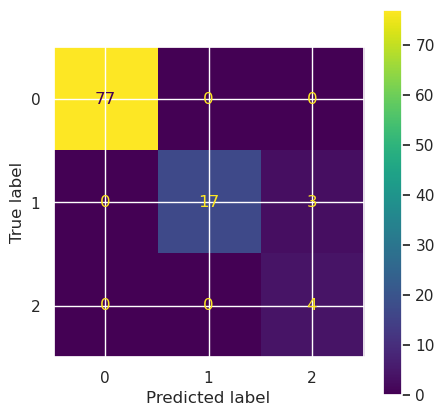

Random Forest Results
Accuracy [ with RF]: 97.02970297029702 %
Recall  [ with RF]: [100.  85. 100.] %
precision [ with RF]: [100.         100.          57.14285714] %


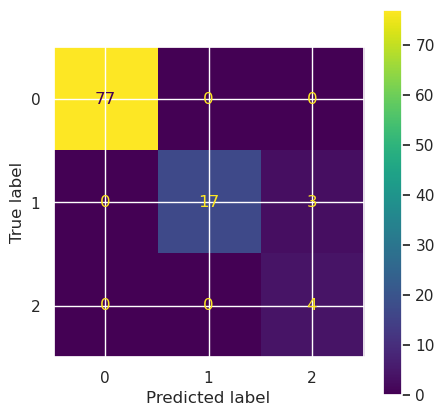

Logistic Regression Results
Accuracy [ with LR]: 97.02970297029702 %
Recall  [ with LR]: [100.  85. 100.] %
precision [ with LR]: [100.         100.          57.14285714] %


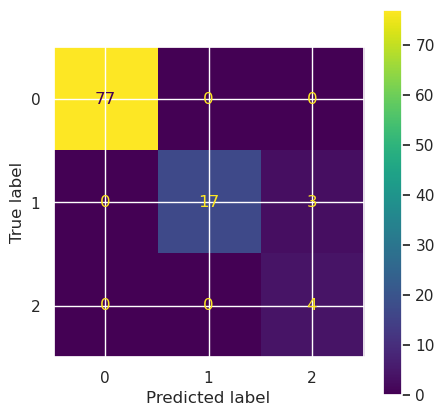

XGB Results
Accuracy [ with XGB]: 97.02970297029702 %
Recall  [ with XGB]: [100.  85. 100.] %
precision [ with XGB]: [100.         100.          57.14285714] %


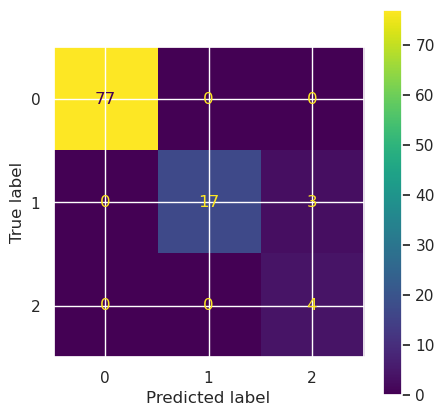

In [31]:
# develop model

# decision tree
print("----------DECISION TREE----------\n")
DT_model = DecisionTreeClassifier()
DT_model_gt = DT_model.fit(X1_train, y1_train)


feature_names = data.drop(data_geotech, axis=1)

features = ['BOREHOLE', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness']

# save a tree diagram as a pdf
dot_data = tree.export_graphviz(DT_model, out_file=None, filled=True, 
                                rounded=True, 
                                special_characters=True, 
                                feature_names=features)

graph = graphviz.Source(dot_data)
graph.render("geotech Tree")

# Predict targets on the testing data
DT_predictions_gt = DT_model_gt.predict(X1_test)
dt_acc_gt = accuracy_score(y1_test, DT_predictions_gt)
dt_recall_gt = recall_score(y1_test, DT_predictions_gt, average=None)
dt_precision_gt = precision_score(y1_test, DT_predictions_gt, average=None)
# xgb_mcc = matthews_corrcoef(y3_test, DT_predictions_gt)

print("=========================================================================")
print("Decision Tree Results")
print("=========================================================================")
print("Accuracy [ with Decision Tree]: " + str(dt_acc_gt * 100) + " %")
print("Recall  [ with Decision Tree]: " + str(dt_recall_gt * 100) + " %")
print("precision [ with Decision Tree]: " + str(dt_precision_gt * 100) + " %")
# print("MCC [ with ET]: " + str(xgb_mcc))

cm = confusion_matrix(y1_test, DT_predictions_gt, labels=DT_model_gt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT_model_gt.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()

# random forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model_gt = rf_model.fit(X1_train, y1_train)

# Predict targets on the testing data
RF_predictions_gt = rf_model_gt.predict(X1_test)
rf_acc_gt = accuracy_score(y1_test, RF_predictions_gt)
rf_recall_gt = recall_score(y1_test, RF_predictions_gt ,average=None)
rf_precision_gt = precision_score(y1_test, RF_predictions_gt, average=None)
# rf_mcc = matthews_corrcoef(y1_test, RF_predictions_gt)

print("=========================================================================")
print("Random Forest Results")
print("=========================================================================")
print("Accuracy [ with RF]: " + str(rf_acc_gt * 100) + " %")
print("Recall  [ with RF]: " + str(rf_recall_gt * 100) + " %")
print("precision [ with RF]: " + str(rf_precision_gt * 100) + " %")
# print("MCC [ with RF]: " + str(rf_mcc))


cm = confusion_matrix(y1_test, RF_predictions_gt, labels=rf_model_gt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model_gt.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()

### LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter = 3000)
lr_model_gt = lr_model.fit(X1_train, y1_train)


# Predict targets on the testing data
LR_predictions_gt = lr_model_gt.predict(X1_test)
lr_acc_gt = accuracy_score(y1_test, LR_predictions_gt)
lr_recall_gt = recall_score(y1_test, LR_predictions_gt, average=None)
lr_precision_gt = precision_score(y1_test, LR_predictions_gt, average=None)
# lr_mcc = matthews_corrcoef(y1_test, LR_predictions_gt)

print("=========================================================================")
print("Logistic Regression Results")
print("=========================================================================")
print("Accuracy [ with LR]: " + str(lr_acc_gt * 100) + " %")
print("Recall  [ with LR]: " + str(lr_recall_gt * 100) + " %")
print("precision [ with LR]: " + str(lr_precision_gt * 100) + " %")
# print("MCC [ with LR]: " + str(lr_mcc))

cm = confusion_matrix(y1_test, LR_predictions_gt, labels=lr_model_gt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model_gt.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()

# XGBOOST

from sklearn.ensemble import GradientBoostingClassifier

xgb_model = GradientBoostingClassifier()
xgb_model_gt = xgb_model.fit(X1_train, y1_train)

# Predict targets on the testing data
XGB_predictions_gt = xgb_model_gt.predict(X1_test)
xgb_acc_gt = accuracy_score(y1_test, XGB_predictions_gt)
xgb_recall_gt = recall_score(y1_test, XGB_predictions_gt, average=None)
xgb_precision_gt = precision_score(y1_test, XGB_predictions_gt, average=None)
# xgb_mcc = matthews_corrcoef(y1_test, XGB_predictions_gt)

print("=========================================================================")
print("XGB Results")
print("=========================================================================")
print("Accuracy [ with XGB]: " + str(xgb_acc_gt * 100) + " %")
print("Recall  [ with XGB]: " + str(xgb_recall_gt * 100) + " %")
print("precision [ with XGB]: " + str(xgb_precision_gt * 100) + " %")
# print("MCC [ with ET]: " + str(xgb_mcc))

cm = confusion_matrix(y1_test, XGB_predictions_gt, labels=xgb_model_gt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model_gt.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()


# ROCK QUALITY DESIGNATION

In [32]:
# separate features and target variables
X2 = data_RQD
y2 = data['RQD m']

# print shape
print("Shape of the data: \n",X2.shape, "\n")

# check quantities of the output
# print("Quantity value count: \n", y2.value_counts(), "\n")

# split the data 30% test data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1, test_size=0.3)


# standardize the data
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.fit_transform(X2_test)

print("X train shape: ", X2_train.shape)
print("y train shape: ", y2_train.shape)
print("X test shape: ", X2_test.shape)
print("y test shape: ", y2_test.shape)

Shape of the data: 
 (505, 4) 

X train shape:  (353, 4)
y train shape:  (353,)
X test shape:  (152, 4)
y test shape:  (152,)


In [33]:
# develop model

# decision tree
print("----------DECISION TREE----------\n")
DT_model = DecisionTreeRegressor()
DT_model_rqd = DT_model.fit(X2_train, y2_train)


feature_names = data.drop(data_RQD, axis=1)

features = ["Borehole ID", "Depth From (m)", "Depth to (m)","Run Length (m)"]

# save a tree diagram as a pdf
dot_data = tree.export_graphviz(DT_model, out_file=None, filled=True, 
                                rounded=True, 
                                special_characters=True, 
                                feature_names=features)

graph = graphviz.Source(dot_data)
graph.render("RQD Tree")

# make prediction
DT_pred_rqd = DT_model_rqd.predict(X2_test)
# print("predictions: \n", DT_pred_rqd, "\n")

# # Evaluate the Model performance
print("----------MODEL PERFORMANCE----------\n")


dt_mse_rqd = mean_squared_error(y2_test, DT_pred_rqd)
dt_r2_rqd = r2_score(y2_test, DT_pred_rqd)

print("Mean Squared Error:", dt_mse_rqd)

print("R-squared:", dt_r2_rqd)

# Random Forest
print("----------RANDOM FOREST----------\n")

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor and fit it to the training data
RF_model = RandomForestRegressor()
RF_model_rqd = RF_model.fit(X2_train, y2_train)

# Make predictions on the testing data
RF_pred_rqd = RF_model_rqd.predict(X2_test)
# print("predictions: \n", RF_pred_rqd, "\n")

# # Evaluate the Model performance
print("----------MODEL PERFORMANCE----------\n")

rf_mse_rqd = mean_squared_error(y2_test, RF_pred_rqd)
rf_r2_rqd = r2_score(y2_test, RF_pred_rqd)

print("Mean Squared Error:", rf_mse_rqd)
print("R-squared:", rf_r2_rqd)


# XGBoost
print("----------XGBOOST----------\n")
import xgboost as xgb

# Create an XGBoost regressor and fit it to the training data
XGB_model = xgb.XGBRegressor()
XGB_model_rqd = XGB_model.fit(X2_train, y2_train)

# Make predictions on the testing data
XGB_pred_rqd = XGB_model_rqd.predict(X2_test)
# print("predictions: \n", XGB_pred_rqd, "\n")

# # Evaluate the Model performance
print("----------MODEL PERFORMANCE----------\n")
xgb_mse_rqd = mean_squared_error(y2_test, XGB_pred_rqd)
xgb_r2_rqd = r2_score(y2_test, XGB_pred_rqd)

print("Mean Squared Error:", xgb_mse_rqd)
print("R-squared:", xgb_r2_rqd)

# Neural Networks
print("----------NEURAL NETWORKS----------\n")

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Create the neural network model
NN_model = Sequential()
NN_model.add(Dense(64, activation='relu', input_shape=(X2_train.shape[1],)))
NN_model.add(Dense(64, activation='relu'))
NN_model.add(Dense(1))  # Output layer with a single neuron for regression

# Compile the model
NN_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
NN_model.fit(X2_train, y2_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the testing data
NN_pred_rqd = NN_model.predict(X2_test)
# print("predictions: \n", NN_pred_rqd, "\n")

# # Evaluate the Model performance
print("----------MODEL PERFORMANCE----------\n")

NN_mse_rqd = mean_squared_error(y2_test, NN_pred_rqd)
NN_r2_rqd = r2_score(y2_test, NN_pred_rqd)

print("Mean Squared Error:", NN_mse_rqd)
print("R-squared:", NN_r2_rqd)

----------DECISION TREE----------

----------MODEL PERFORMANCE----------

Mean Squared Error: 0.11676578947368424
R-squared: 0.23192605781971454
----------RANDOM FOREST----------

----------MODEL PERFORMANCE----------

Mean Squared Error: 0.06773091493421057
R-squared: 0.5544726663906892
----------XGBOOST----------

----------MODEL PERFORMANCE----------

Mean Squared Error: 0.07736763022964045
R-squared: 0.49108329575402654
----------NEURAL NETWORKS----------



2023-07-08 20:36:07.065942: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 20:36:07.120677: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 20:36:07.122315: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 20:36:08.085196: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


5/5 [==============================] - 0s 2ms/step
----------MODEL PERFORMANCE----------

Mean Squared Error: 0.06105115771739221
R-squared: 0.5984114560092457


# SRF

In [34]:
# print shape
print("Shape of the data: \n", data_SRF.shape, "\n")

# check quantities of the output
print("Quantity value count: \n", data["SRF"].value_counts(), "\n")

Shape of the data: 
 (505, 4) 

Quantity value count: 
 1.00    301
1.25    198
2.50      3
7.50      2
5.00      1
Name: SRF, dtype: int64 



In [35]:
bins = (0, 1, 8)
group_names = ["lowest", "low"]
data.SRF = pd.cut(data["SRF"], bins=bins, labels=group_names)
data["SRF"].unique()

['low', 'lowest']
Categories (2, object): ['lowest' < 'low']

Quantity value count: 
 lowest    301
low       204
Name: SRF, dtype: int64


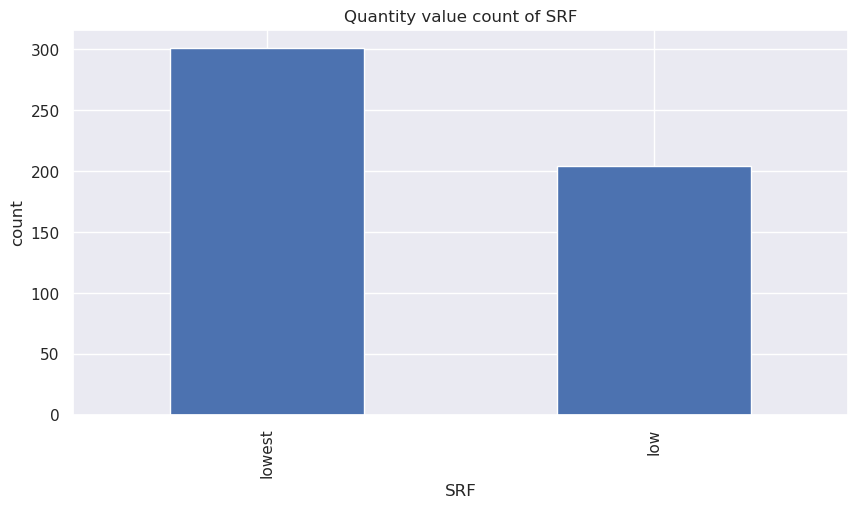

In [36]:
# check quantities of the output
# print("Quantity value count: \n", data["SRF"].value_counts(), "\n")

ax = data["SRF"].value_counts().sort_index()
ax.plot(kind='bar',
          title='Quantity value count of SRF',
        xlabel='SRF',
        ylabel='count',
          figsize=(10, 5))

# grouped the values 1.25 -> 7.5 into 1 class.
print("Quantity value count: \n", ax)
plt.show()

In [37]:
# decided to change the SRF into a categorical column because it has only 5 classes


# encode the target variables
le = LabelEncoder()
data['SRF'] = le.fit_transform(data['SRF'])

#separate features and target variables
X3 = data_SRF
y3 = data['SRF']



# print shape
print("Shape of the data: \n",X3.shape, "\n")

# check quantities of the output
print("Quantity value count: \n", y3.value_counts(), "\n")

# split the data 30% test data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=1, test_size=0.3)


# standardize the data
scaler = StandardScaler()

X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.fit_transform(X3_test)

Shape of the data: 
 (505, 4) 

Quantity value count: 
 1    301
0    204
Name: SRF, dtype: int64 



----------DECISION TREE----------

Decision Tree Results
Accuracy [ with Decision Tree]: 96.71052631578947 %
Recall  [ with Decision Tree]: [100.          94.68085106] %
precision [ with Decision Tree]: [ 92.06349206 100.        ] %


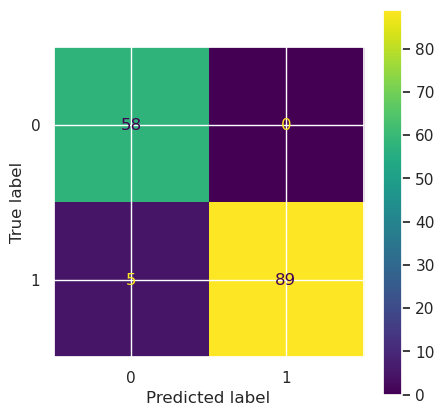

XGB Results
Accuracy [ with XGB]: 98.02631578947368 %
Recall  [ with XGB]: [100.          96.80851064] %
precision [ with XGB]: [ 95.08196721 100.        ] %


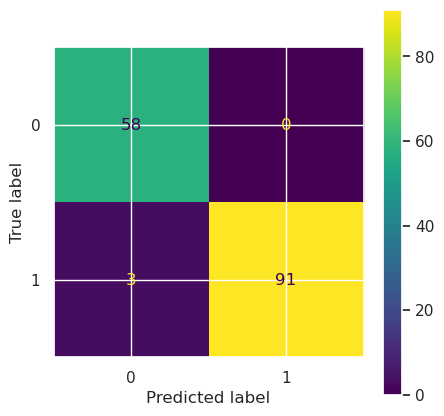

Logistic Regression Results
Accuracy [ with LR]: 98.02631578947368 %
Recall  [ with LR]: [100.          96.80851064] %
precision [ with LR]: [ 95.08196721 100.        ] %


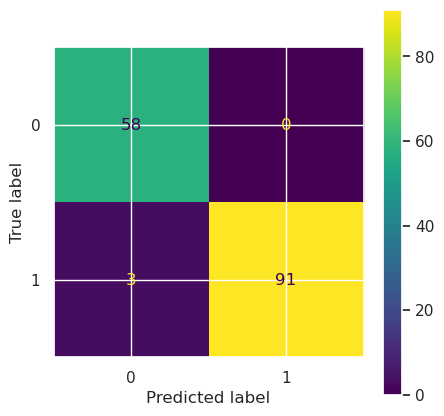

Random Forest Results
Accuracy [ with RF]: 96.71052631578947 %
Recall  [ with RF]: [100.          94.68085106] %
precision [ with RF]: [ 92.06349206 100.        ] %


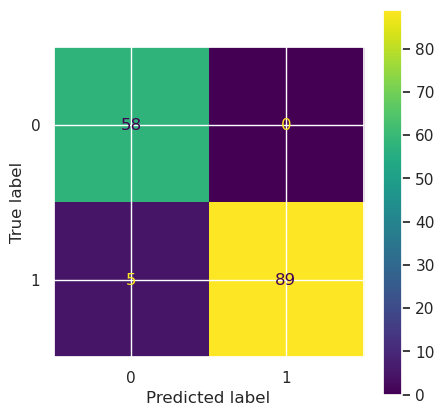

In [38]:
# develop model

# decision tree
print("----------DECISION TREE----------\n")
DT_model = DecisionTreeClassifier()
DT_model_srf = DT_model.fit(X3_train, y3_train)


feature_names = data.drop(data_SRF, axis=1)

features = ["Density", "Virgin Stress", "UCS Mpa", "UCS/Virgin stress ratio"]

# save a tree diagram as a pdf
dot_data = tree.export_graphviz(DT_model, out_file=None, filled=True, 
                                rounded=True, 
                                special_characters=True, 
                                feature_names=features)

graph = graphviz.Source(dot_data)
graph.render("SRF Tree")

# Predict targets on the testing data
DT_predictions_srf = DT_model_srf.predict(X3_test)
dt_acc_srf = accuracy_score(y3_test, DT_predictions_srf)
dt_recall_srf = recall_score(y3_test, DT_predictions_srf, average=None)
dt_precision_srf = precision_score(y3_test, DT_predictions_srf, average=None)
# xgb_mcc = matthews_corrcoef(y3_test, test_predictions)

print("=========================================================================")
print("Decision Tree Results")
print("=========================================================================")
print("Accuracy [ with Decision Tree]: " + str(dt_acc_srf * 100) + " %")
print("Recall  [ with Decision Tree]: " + str(dt_recall_srf * 100) + " %")
print("precision [ with Decision Tree]: " + str(dt_precision_srf * 100) + " %")
# print("MCC [ with ET]: " + str(xgb_mcc))

cm = confusion_matrix(y3_test, DT_predictions_srf, labels=DT_model_srf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT_model_srf.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()

# XGBOOST

from sklearn.ensemble import GradientBoostingClassifier

xgb_model = GradientBoostingClassifier()
xgb_model_srf = xgb_model.fit(X3_train, y3_train)

# Predict targets on the testing data
XGB_predictions_srf = xgb_model_srf.predict(X3_test)
xgb_acc_srf = accuracy_score(y3_test, XGB_predictions_srf)
xgb_recall_srf = recall_score(y3_test, XGB_predictions_srf, average=None)
xgb_precision_srf = precision_score(y3_test, XGB_predictions_srf, average=None)
# xgb_mcc = matthews_corrcoef(y3_test, XGB_predictions_srf)

print("=========================================================================")
print("XGB Results")
print("=========================================================================")
print("Accuracy [ with XGB]: " + str(xgb_acc_srf * 100) + " %")
print("Recall  [ with XGB]: " + str(xgb_recall_srf * 100) + " %")
print("precision [ with XGB]: " + str(xgb_precision_srf * 100) + " %")
# print("MCC [ with ET]: " + str(xgb_mcc))

cm = confusion_matrix(y3_test, XGB_predictions_srf, labels=xgb_model_srf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model_srf.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()


### LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter = 3000)
lr_model_srf = lr_model.fit(X3_train, y3_train)


# Predict targets on the testing data
LR_predictions_srf = lr_model_srf.predict(X3_test)
lr_acc_srf = accuracy_score(y3_test, LR_predictions_srf)
lr_recall_srf = recall_score(y3_test, LR_predictions_srf, average=None)
lr_precision_srf = precision_score(y3_test, LR_predictions_srf, average=None)
# lr_mcc = matthews_corrcoef(y1_test, LR_predictions_srf)

print("=========================================================================")
print("Logistic Regression Results")
print("=========================================================================")
print("Accuracy [ with LR]: " + str(lr_acc_srf * 100) + " %")
print("Recall  [ with LR]: " + str(lr_recall_srf * 100) + " %")
print("precision [ with LR]: " + str(lr_precision_srf * 100) + " %")
# print("MCC [ with LR]: " + str(lr_mcc))

cm = confusion_matrix(y3_test, LR_predictions_srf, labels=lr_model_srf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model_srf.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()

# random forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model_srf = rf_model.fit(X3_train, y3_train)

# Predict targets on the testing data
RF_predictions_srf = rf_model_srf.predict(X3_test)
rf_acc_srf = accuracy_score(y3_test, RF_predictions_srf)
rf_recall_srf = recall_score(y3_test, RF_predictions_srf ,average=None)
rf_precision_srf = precision_score(y3_test, RF_predictions_srf, average=None)
# rf_mcc = matthews_corrcoef(y3_test, RF_predictions_srf)

print("=========================================================================")
print("Random Forest Results")
print("=========================================================================")
print("Accuracy [ with RF]: " + str(rf_acc_srf * 100) + " %")
print("Recall  [ with RF]: " + str(rf_recall_srf * 100) + " %")
print("precision [ with RF]: " + str(rf_precision_srf * 100) + " %")
# print("MCC [ with RF]: " + str(rf_mcc))


cm = confusion_matrix(y3_test, RF_predictions_srf, labels=rf_model_srf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model_srf.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()

In [39]:
# # trying regressor
# # worked before i encode the data

# # develop model

# # decision tree
# print("----------DECISION TREE----------\n")
# DT_model = DecisionTreeRegressor()
# DT_model.fit(X3_train, y3_train)


# feature_names = data.drop(data_SRF, axis=1)

# features = ["Density", "Virgin Stress", "UCS Mpa", "UCS/Virgin stress ratio"]

# # save a tree diagram as a pdf
# dot_data = tree.export_graphviz(DT_model, out_file=None, filled=True, 
#                                 rounded=True, 
#                                 special_characters=True, 
#                                 feature_names=features)

# graph = graphviz.Source(dot_data)
# graph.render("SRF Tree")

# # make prediction
# DT_pred = DT_model.predict(X3_test)
# print("predictions: \n", DT_pred, "\n")

# # Model performance
# print("----------MODEL PERFORMANCE----------\n")

# mse = mean_squared_error(y3_test, DT_pred)
# r2 = r2_score(y3_test, DT_pred)

# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

# # confusion matrix
# # cnf_matrix = metrics.confusion_matrix(y3_test, DT_pred )
# # print("Confusion matrix: \n", cnf_matrix, "\n")

# # cm = confusion_matrix(DT_pred,y3_test, labels=DT_model.classes_)
# # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT_model.classes_)
# # plt.rcParams["figure.figsize"] = (5, 5)
# # disp.plot()
# # plt.show()

# # accuracy
# accuracy = metrics.accuracy_score(y3_test, DT_pred)
# print("Accuracy: %.3f" % (accuracy*100), "\n")

# # precision score
# print("Precision score: %.3f" % precision_score(y3_test, DT_pred,  average="macro"), "\n")

# # recall score
# print("Recall score: %.3f" % recall_score(y3_test, DT_pred,  average='macro'), "\n")

# MAXIMUM UNSUPPORTED SPAN

In [40]:
# separate features and target variables
X4 = data_unsupported_span
y4 = data['Maximum unsupported span']

X5 = data_mus


# print shape
print("Shape of the data: \n", X4.shape, "\n")
print("Shape of the data: \n", X5.shape, "\n")

# check quantities of the output
# print("Quantity value count: \n", y4.value_counts(), "\n")

# split the data 30% test data
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=1, test_size=0.3)

X5_train, X5_test, y4_train, y4_test = train_test_split(X5, y4, random_state=1, test_size=0.3)


# standardize the data
scaler = StandardScaler()
X4_train = scaler.fit_transform(X4_train)
X4_test = scaler.fit_transform(X4_test)


# standardize the data
scaler = StandardScaler()
X5_train = scaler.fit_transform(X5_train)
X5_test = scaler.fit_transform(X5_test)

Shape of the data: 
 (505, 25) 

Shape of the data: 
 (505, 9) 



In [41]:


# develop model

# decision tree
print("----------DECISION TREE----------\n")
DT_model = DecisionTreeRegressor()
DT_model_mus = DT_model.fit(X5_train, y4_train)

features = ['RQD %', 'Jn', 'Jr','Ja', 'Jw', 'SRF', 'Q Value', 'RMR', 'ESR VALUE']

# save a tree diagram as a pdf
dot_data = tree.export_graphviz(DT_model, out_file=None, filled=True, 
                                rounded=True, 
                                special_characters=True, 
                                feature_names=features)

graph = graphviz.Source(dot_data)
graph.render("max Unsupported span Tree")

# make prediction
DT_pred_mus = DT_model_mus.predict(X5_test)
# print("predictions: \n", DT_pred_mus, "\n")

# Model performance
print("----------MODEL PERFORMANCE----------\n")

dt_mse_mus1 = mean_squared_error(y4_test, DT_pred_mus)
dt_r2_mus1 = r2_score(y4_test, DT_pred_mus)

print("Mean Squared Error:", dt_mse_mus1)
print("R-squared:", dt_r2_mus1)


# Random Forest
print("----------RANDOM FOREST----------\n")

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor and fit it to the training data
RF_model = RandomForestRegressor()
RF_model_mus = RF_model.fit(X5_train, y4_train)

# Make predictions on the testing data
RF_pred_mus = RF_model_mus.predict(X5_test)
# print("predictions: \n", RF_pred_mus, "\n")

# # Evaluate the Model performance
print("----------MODEL PERFORMANCE----------\n")

RF_mse_mus1 = mean_squared_error(y4_test, RF_pred_mus)
RF_r2_mus1 = r2_score(y4_test, RF_pred_mus)

print("Mean Squared Error:", RF_mse_mus1)
print("R-squared:", RF_r2_mus1)


# XGBoost
print("----------XGBOOST----------\n")
import xgboost as xgb

# Create an XGBoost regressor and fit it to the training data
XGB_model = xgb.XGBRegressor()
XGB_model_mus = XGB_model.fit(X5_train, y4_train)

# Make predictions on the testing data
XGB_pred_mus = XGB_model_mus.predict(X5_test)
# print("predictions: \n", XGB_pred_mus, "\n")

# # Evaluate the Model performance
print("----------MODEL PERFORMANCE----------\n")

XGB_mse_mus1 = mean_squared_error(y4_test, XGB_pred_mus)
XGB_r2_mus1 = r2_score(y4_test, XGB_pred_mus)

print("Mean Squared Error:", XGB_mse_mus1)
print("R-squared:", XGB_r2_mus1)



# Neural Networks
print("----------NEURAL NETWORKS----------\n")

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Create the neural network model
NN_model = Sequential()
NN_model.add(Dense(64, activation='relu', input_shape=(X5_train.shape[1],)))
NN_model.add(Dense(64, activation='relu'))
NN_model.add(Dense(1))  # Output layer with a single neuron for regression

# Compile the model
NN_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
NN_model_mus = NN_model.fit(X5_train, y4_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the testing data
NN_pred_mus = NN_model.predict(X5_test)
# print("predictions: \n", NN_pred_mus, "\n")

# # Evaluate the Model performance
print("----------MODEL PERFORMANCE----------\n")

NN_mse_mus1 = mean_squared_error(y4_test, NN_pred_mus)
NN_r2_mus1 = r2_score(y4_test, NN_pred_mus)

print("Mean Squared Error:", NN_mse_mus1)
print("R-squared:", NN_r2_mus1)

----------DECISION TREE----------

----------MODEL PERFORMANCE----------

Mean Squared Error: 1.2508836095682951
R-squared: 0.9147246125230557
----------RANDOM FOREST----------

----------MODEL PERFORMANCE----------

Mean Squared Error: 0.8022591746157464
R-squared: 0.9453082913158467
----------XGBOOST----------

----------MODEL PERFORMANCE----------

Mean Squared Error: 2.735455078954629
R-squared: 0.8135182282353701
----------NEURAL NETWORKS----------

5/5 [==============================] - 0s 3ms/step
----------MODEL PERFORMANCE----------

Mean Squared Error: 1.4194219889505952
R-squared: 0.9032349939073621


In [42]:


# develop model

# decision tree
print("----------DECISION TREE----------\n")
DT_model = DecisionTreeRegressor()
DT_model_mus = DT_model.fit(X4_train, y4_train)

# features = ['RQD %', 'Jn', 'Jr','Ja', 'Jw', 'SRF', 'Q Value', 'RMR', 'ESR VALUE']


features = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE']

# save a tree diagram as a pdf
dot_data = tree.export_graphviz(DT_model, out_file=None, filled=True, 
                                rounded=True, 
                                special_characters=True, 
                                feature_names=features)

graph = graphviz.Source(dot_data)
graph.render("max Unsupported span Tree")

# make prediction
DT_pred_mus = DT_model_mus.predict(X4_test)
# print("predictions: \n", DT_pred_mus, "\n")

# Model performance
print("----------MODEL PERFORMANCE----------\n")

dt_mse_mus = mean_squared_error(y4_test, DT_pred_mus)
dt_r2_mus = r2_score(y4_test, DT_pred_mus)

print("Mean Squared Error:", dt_mse_mus)
print("R-squared:", dt_r2_mus)


# Random Forest
print("----------RANDOM FOREST----------\n")

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor and fit it to the training data
RF_model = RandomForestRegressor()
RF_model_mus = RF_model.fit(X4_train, y4_train)

# Make predictions on the testing data
RF_pred_mus = RF_model_mus.predict(X4_test)
# print("predictions: \n", RF_pred_mus, "\n")

# # Evaluate the Model performance
print("----------MODEL PERFORMANCE----------\n")

RF_mse_mus = mean_squared_error(y4_test, RF_pred_mus)
RF_r2_mus = r2_score(y4_test, RF_pred_mus)

print("Mean Squared Error:", RF_mse_mus)
print("R-squared:", RF_r2_mus)


# XGBoost
print("----------XGBOOST----------\n")
import xgboost as xgb

# Create an XGBoost regressor and fit it to the training data
XGB_model = xgb.XGBRegressor()
XGB_model_mus = XGB_model.fit(X4_train, y4_train)

# Make predictions on the testing data
XGB_pred_mus = XGB_model_mus.predict(X4_test)
# print("predictions: \n", XGB_pred_mus, "\n")

# # Evaluate the Model performance
print("----------MODEL PERFORMANCE----------\n")

XGB_mse_mus = mean_squared_error(y4_test, XGB_pred_mus)
XGB_r2_mus = r2_score(y4_test, XGB_pred_mus)

print("Mean Squared Error:", XGB_mse_mus)
print("R-squared:", XGB_r2_mus)



# Neural Networks
print("----------NEURAL NETWORKS----------\n")

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Create the neural network model
NN_model = Sequential()
NN_model.add(Dense(64, activation='relu', input_shape=(X4_train.shape[1],)))
NN_model.add(Dense(64, activation='relu'))
NN_model.add(Dense(1))  # Output layer with a single neuron for regression

# Compile the model
NN_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
NN_model_mus = NN_model.fit(X4_train, y4_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the testing data
NN_pred_mus = NN_model.predict(X4_test)
# print("predictions: \n", NN_pred_mus, "\n")

# # Evaluate the Model performance
print("----------MODEL PERFORMANCE----------\n")

NN_mse_mus = mean_squared_error(y4_test, NN_pred_mus)
NN_r2_mus = r2_score(y4_test, NN_pred_mus)

print("Mean Squared Error:", NN_mse_mus)
print("R-squared:", NN_r2_mus)

----------DECISION TREE----------

----------MODEL PERFORMANCE----------

Mean Squared Error: 1.1623578976887008
R-squared: 0.9207595979721096
----------RANDOM FOREST----------

----------MODEL PERFORMANCE----------

Mean Squared Error: 0.7892010644378514
R-squared: 0.9461984903692351
----------XGBOOST----------

----------MODEL PERFORMANCE----------

Mean Squared Error: 2.362633820294155
R-squared: 0.8389342438012677
----------NEURAL NETWORKS----------

5/5 [==============================] - 0s 2ms/step
----------MODEL PERFORMANCE----------

Mean Squared Error: 1.744276212327601
R-squared: 0.8810889928245303


# Use SMOTE to balance out the data

In [43]:
# only works for categorical values

# separate features and target variables
X1 = data_geotech
y1 = data["Geotech Domain"]

# separate features and target variables
# encode the target variables
# le = LabelEncoder()
# data['SRF'] = le.fit_transform(data['SRF'])

#separate features and target variables
# X3 = data_SRF
# y3 = data['SRF']


smt = SMOTE()
X1, y1 = smt.fit_resample(X1, y1)
X3, y3 = smt.fit_resample(X3, y3)


# check quantities of the output
print("Quantity value count: \n", y1.value_counts(), "\n")

# check quantities of the output
print("Quantity value count: \n", y3.value_counts(), "\n")

# split the data 30% test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1, test_size=0.3)

# split the data 30% test data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=1, test_size=0.3)


# standardize the data
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.fit_transform(X1_test)

# standardize the data
scaler = StandardScaler()
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.fit_transform(X3_test)

print("========== GEO TECH DOMAIN ==========")
print("X train shape: ", X1_train.shape)
print("y train shape: ", y1_train.shape)
print("X test shape: ", X1_test.shape)
print("y test shape: ", y1_test.shape)

print("         ")
print("========== SRF ==========")
print("X3 train shape: ", X3_train.shape)
print("y3 train shape: ", y3_train.shape)
print("X3 test shape: ", X3_test.shape)
print("y3 test shape: ", y3_test.shape)

Quantity value count: 
 2    371
1    371
0    371
Name: Geotech Domain, dtype: int64 

Quantity value count: 
 0    301
1    301
Name: SRF, dtype: int64 

========== GEO TECH DOMAIN ==========
X train shape:  (779, 7)
y train shape:  (779,)
X test shape:  (334, 7)
y test shape:  (334,)
         
========== SRF ==========
X3 train shape:  (421, 4)
y3 train shape:  (421,)
X3 test shape:  (181, 4)
y3 test shape:  (181,)


Quantity value count: 
 0    371
1    371
2    371
Name: Geotech Domain, dtype: int64


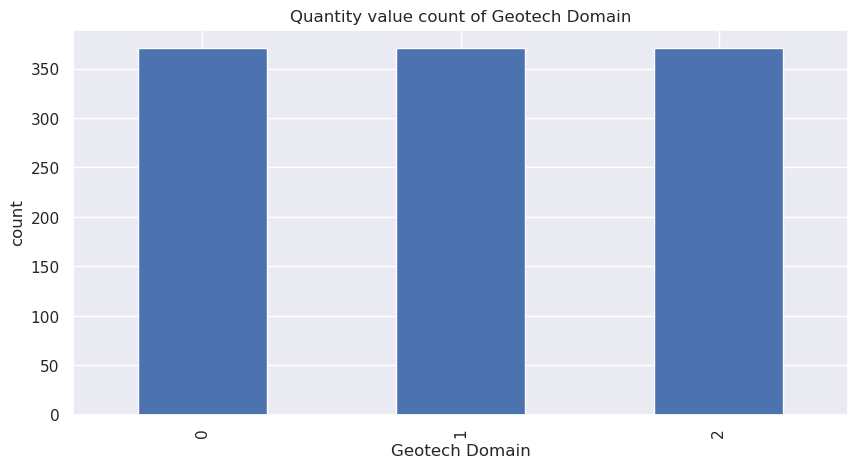

In [44]:
ax = y1.value_counts().sort_index()
ax.plot(kind='bar',
          title='Quantity value count of Geotech Domain',
        xlabel='Geotech Domain',
        ylabel='count',
          figsize=(10, 5))
print("Quantity value count: \n", ax)
plt.show()

# Geo-tech Domain 

----------DECISION TREE----------

Decision Tree Results
Accuracy [ with Decision Tree]: 99.40119760479041 %
Recall  [ with Decision Tree]: [100.          99.13793103  99.07407407] %
precision [ with Decision Tree]: [100.          99.13793103  99.07407407] %


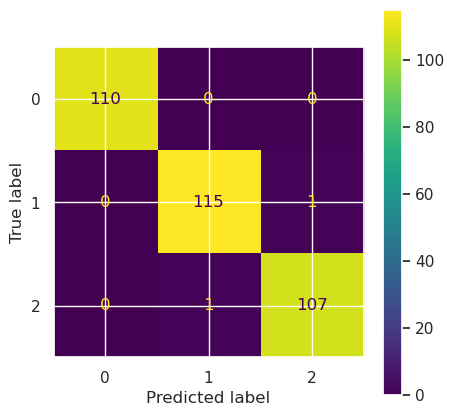

Random Forest Results
Accuracy [ with RF]: 99.7005988023952 %
Recall  [ with RF]: [100.          99.13793103 100.        ] %
precision [ with RF]: [100.         100.          99.08256881] %


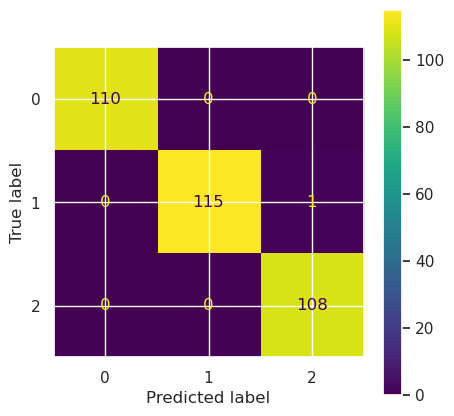

Logistic Regression Results
Accuracy [ with LR]: 99.40119760479041 %
Recall  [ with LR]: [100.          98.27586207 100.        ] %
precision [ with LR]: [100.         100.          98.18181818] %


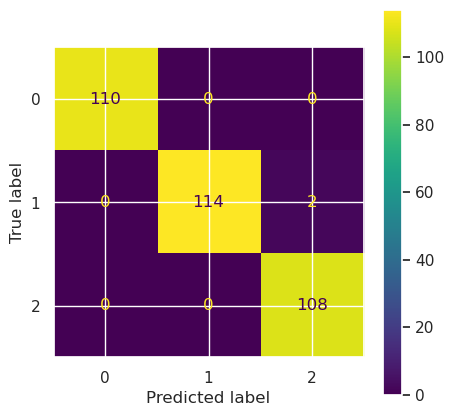

XGB Results
Accuracy [ with XGB]: 99.7005988023952 %
Recall  [ with XGB]: [100.          99.13793103 100.        ] %
precision [ with XGB]: [100.         100.          99.08256881] %


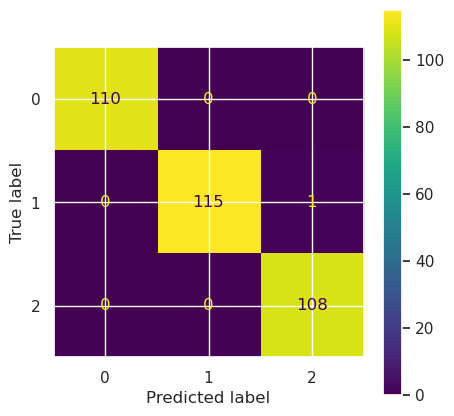

In [45]:
# develop model

# decision tree
print("----------DECISION TREE----------\n")
DT_model = DecisionTreeClassifier()
DT_model_sgt = DT_model.fit(X1_train, y1_train)


feature_names = data.drop(data_geotech, axis=1)

features = ['BOREHOLE', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness']

# save a tree diagram as a pdf
dot_data = tree.export_graphviz(DT_model, out_file=None, filled=True, 
                                rounded=True, 
                                special_characters=True, 
                                feature_names=features)

graph = graphviz.Source(dot_data)
graph.render("geotech Tree")

# make prediction
# DT_pred = DT_model.predict(X1_test)
# print("predictions: \n", DT_pred, "\n")

# Predict targets on the testing data
DT_predictions_gt = DT_model_sgt.predict(X1_test)
sdt_acc_gt = accuracy_score(y1_test, DT_predictions_gt)
sdt_recall_gt = recall_score(y1_test, DT_predictions_gt, average=None)
sdt_precision_gt = precision_score(y1_test, DT_predictions_gt, average=None)
# xgb_mcc = matthews_corrcoef(y3_test, DT_predictions_gt)

print("=========================================================================")
print("Decision Tree Results")
print("=========================================================================")
print("Accuracy [ with Decision Tree]: " + str(sdt_acc_gt * 100) + " %")
print("Recall  [ with Decision Tree]: " + str(sdt_recall_gt * 100) + " %")
print("precision [ with Decision Tree]: " + str(sdt_precision_gt * 100) + " %")
# print("MCC [ with ET]: " + str(xgb_mcc))

cm = confusion_matrix(y1_test, DT_predictions_gt, labels=DT_model_sgt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT_model_sgt.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()


# random forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
RF_model_sgt = RF_model.fit(X1_train, y1_train)

# Predict targets on the testing data
RF_predictions_sgt = RF_model_sgt.predict(X1_test)
srf_acc_gt = accuracy_score(y1_test, RF_predictions_sgt)
srf_recall_gt = recall_score(y1_test, RF_predictions_sgt ,average=None)
srf_precision_gt = precision_score(y1_test, RF_predictions_sgt, average=None)
# rf_mcc = matthews_corrcoef(y1_test, RF_predictions_sgt)

print("=========================================================================")
print("Random Forest Results")
print("=========================================================================")
print("Accuracy [ with RF]: " + str(srf_acc_gt * 100) + " %")
print("Recall  [ with RF]: " + str(srf_recall_gt * 100) + " %")
print("precision [ with RF]: " + str(srf_precision_gt * 100) + " %")
# print("MCC [ with RF]: " + str(rf_mcc))


cm = confusion_matrix(y1_test, RF_predictions_sgt, labels=RF_model_sgt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_model_sgt.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()


# logistic regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter = 3000)
lr_model_sgt = lr_model.fit(X1_train, y1_train)


# Predict targets on the testing data
LR_predictions_sgt = lr_model_sgt.predict(X1_test)
slr_acc_gt = accuracy_score(y1_test, LR_predictions_sgt)
slr_recall_gt = recall_score(y1_test, LR_predictions_sgt, average=None)
slr_precision_gt = precision_score(y1_test, LR_predictions_sgt, average=None)
# lr_mcc = matthews_corrcoef(y1_test, LR_predictions_sgt)

print("=========================================================================")
print("Logistic Regression Results")
print("=========================================================================")
print("Accuracy [ with LR]: " + str(slr_acc_gt * 100) + " %")
print("Recall  [ with LR]: " + str(slr_recall_gt * 100) + " %")
print("precision [ with LR]: " + str(slr_precision_gt * 100) + " %")
# print("MCC [ with LR]: " + str(lr_mcc))

cm = confusion_matrix(y1_test, LR_predictions_sgt, labels=lr_model_sgt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model_sgt.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()

# XGBoost

from sklearn.ensemble import GradientBoostingClassifier

xgb_model = GradientBoostingClassifier()
xgb_model_sgt = xgb_model.fit(X1_train, y1_train)

# Predict targets on the testing data
XGB_predictions_sgt = xgb_model_sgt.predict(X1_test)
sxgb_acc_gt = accuracy_score(y1_test, XGB_predictions_sgt)
sxgb_recall_gt = recall_score(y1_test, XGB_predictions_sgt, average=None)
sxgb_precision_gt = precision_score(y1_test, XGB_predictions_sgt, average=None)
# xgb_mcc = matthews_corrcoef(y1_test, XGB_predictions_sgt)

print("=========================================================================")
print("XGB Results")
print("=========================================================================")
print("Accuracy [ with XGB]: " + str(sxgb_acc_gt * 100) + " %")
print("Recall  [ with XGB]: " + str(sxgb_recall_gt * 100) + " %")
print("precision [ with XGB]: " + str(sxgb_precision_gt * 100) + " %")
# print("MCC [ with ET]: " + str(xgb_mcc))

cm = confusion_matrix(y1_test, XGB_predictions_sgt, labels=xgb_model_sgt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model_sgt.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()


## using smote for SRF

Quantity value count: 
 0    301
1    301
Name: SRF, dtype: int64


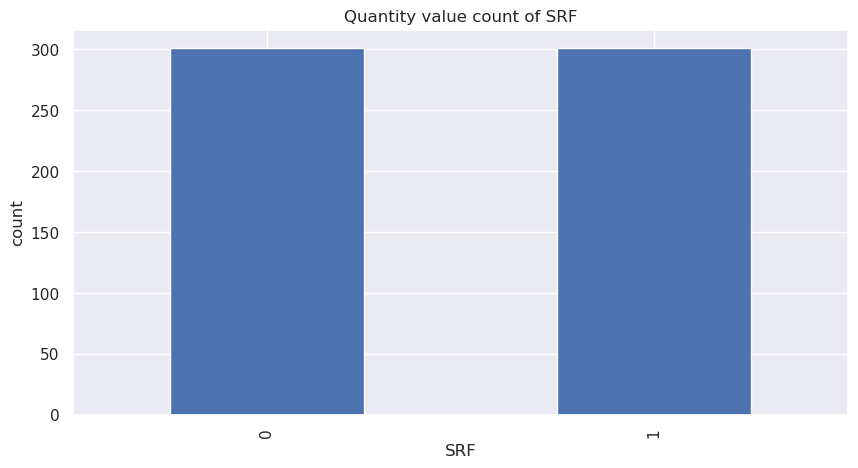

In [46]:
ax = y3.value_counts().sort_index()
ax.plot(kind='bar',
          title='Quantity value count of SRF',
        xlabel='SRF',
        ylabel='count',
          figsize=(10, 5))
print("Quantity value count: \n", ax)
plt.show()

----------DECISION TREE----------

----------MODEL PERFORMANCE----------

Decision Tree Results
Accuracy [ with Decision Tree]: 97.23756906077348 %
Recall  [ with Decision Tree]: [ 94.73684211 100.        ] %
precision [ with Decision Tree]: [100.          94.50549451] %


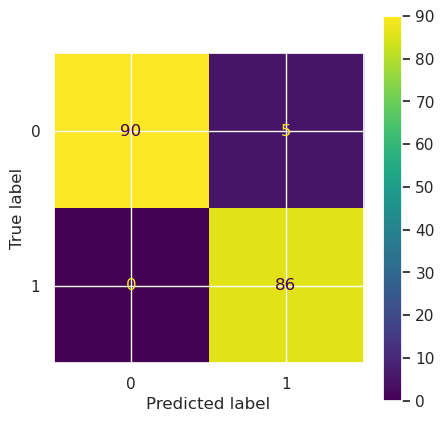

XGB Results
Accuracy [ with XGB]: 97.23756906077348 %
Recall  [ with XGB]: [ 94.73684211 100.        ] %
precision [ with XGB]: [100.          94.50549451] %


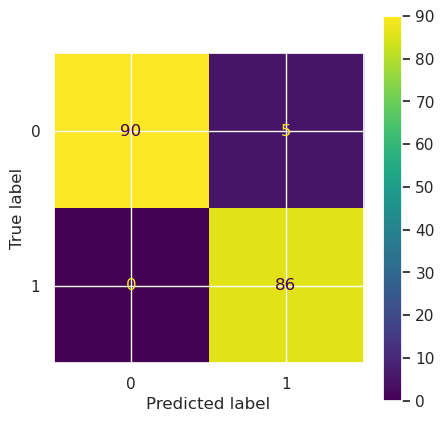

Logistic Regression Results
Accuracy [ with LR]: 96.68508287292818 %
Recall  [ with LR]: [ 93.68421053 100.        ] %
precision [ with LR]: [100.          93.47826087] %


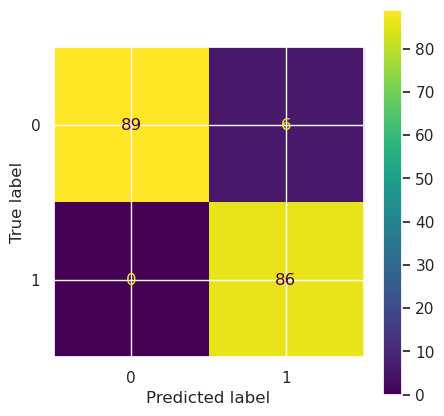

Random Forest Results
Accuracy [ with RF]: 97.23756906077348 %
Recall  [ with RF]: [ 94.73684211 100.        ] %
precision [ with RF]: [100.          94.50549451] %


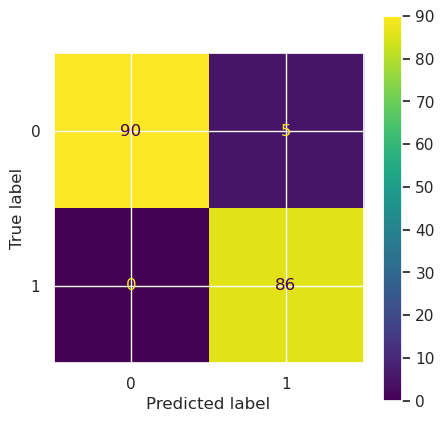

In [47]:
# develop model

# decision tree
print("----------DECISION TREE----------\n")
DT_model = DecisionTreeClassifier()
sDT_model_srf = DT_model.fit(X3_train, y3_train)


feature_names = data.drop(data_SRF, axis=1)

features = ["Density", "Virgin Stress", "UCS Mpa", "UCS/Virgin stress ratio"]

# save a tree diagram as a pdf
dot_data = tree.export_graphviz(DT_model, out_file=None, filled=True, 
                                rounded=True, 
                                special_characters=True, 
                                feature_names=features)

graph = graphviz.Source(dot_data)
graph.render("SRF Tree")

# make prediction
# DT_pred = DT_model.predict(X3_test)
# print("predictions: \n", DT_pred, "\n")

# Model performance
print("----------MODEL PERFORMANCE----------\n")
# confusion matrix
# cnf_matrix = metrics.confusion_matrix(y3_test, DT_pred)
# print("Confusion matrix: \n", cnf_matrix, "\n")

# Predict targets on the testing data
sDT_predictions_srf = sDT_model_srf.predict(X3_test)
sdt_acc_srf = accuracy_score(y3_test, sDT_predictions_srf)
sdt_recall_srf = recall_score(y3_test, sDT_predictions_srf, average=None)
sdt_precision_srf = precision_score(y3_test, sDT_predictions_srf, average=None)
# xgb_mcc = matthews_corrcoef(y3_test, sDT_predictions_srf)

print("=========================================================================")
print("Decision Tree Results")
print("=========================================================================")
print("Accuracy [ with Decision Tree]: " + str(sdt_acc_srf * 100) + " %")
print("Recall  [ with Decision Tree]: " + str(sdt_recall_srf * 100) + " %")
print("precision [ with Decision Tree]: " + str(sdt_precision_srf * 100) + " %")
# print("MCC [ with ET]: " + str(xgb_mcc))

cm = confusion_matrix(y3_test, sDT_predictions_srf, labels=sDT_model_srf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sDT_model_srf.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()



# XGBoost
from sklearn.ensemble import GradientBoostingClassifier

xgb_model = GradientBoostingClassifier()
sxgb_model_srf = xgb_model.fit(X3_train, y3_train)

# Predict targets on the testing data
sXGB_predictions_srf = sxgb_model_srf.predict(X3_test)
sxgb_acc_srf = accuracy_score(y3_test, sXGB_predictions_srf)
sxgb_recall_srf = recall_score(y3_test, sXGB_predictions_srf, average=None)
sxgb_precision_srf = precision_score(y3_test, sXGB_predictions_srf, average=None)
# xgb_mcc = matthews_corrcoef(y3_test, sXGB_predictions_srf)

print("=========================================================================")
print("XGB Results")
print("=========================================================================")
print("Accuracy [ with XGB]: " + str(sxgb_acc_srf * 100) + " %")
print("Recall  [ with XGB]: " + str(sxgb_recall_srf * 100) + " %")
print("precision [ with XGB]: " + str(sxgb_precision_srf * 100) + " %")
# print("MCC [ with ET]: " + str(xgb_mcc))

cm = confusion_matrix(y3_test, sXGB_predictions_srf, labels=sxgb_model_srf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sxgb_model_srf.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()


### LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter = 3000)
slr_model_srf = lr_model.fit(X3_train, y3_train)


# Predict targets on the testing data
sLR_predictions_srf = slr_model_srf.predict(X3_test)
slr_acc_srf = accuracy_score(y3_test, sLR_predictions_srf)
slr_recall_srf = recall_score(y3_test, sLR_predictions_srf, average=None)
slr_precision_srf = precision_score(y3_test, sLR_predictions_srf, average=None)
# lr_mcc = matthews_corrcoef(y1_test, sLR_predictions_srf)

print("=========================================================================")
print("Logistic Regression Results")
print("=========================================================================")
print("Accuracy [ with LR]: " + str(slr_acc_srf * 100) + " %")
print("Recall  [ with LR]: " + str(slr_recall_srf * 100) + " %")
print("precision [ with LR]: " + str(slr_precision_srf * 100) + " %")
# print("MCC [ with LR]: " + str(lr_mcc))

cm = confusion_matrix(y3_test, sLR_predictions_srf, labels=slr_model_srf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=slr_model_srf.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()

# Random forest

from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
srf_model_srf = RF_model.fit(X3_train, y3_train)

# Predict targets on the testing data
sRF_predictions_srf = srf_model_srf.predict(X3_test)
srf_acc_srf = accuracy_score(y3_test, sRF_predictions_srf)
srf_recall_srf = recall_score(y3_test, sRF_predictions_srf ,average=None)
srf_precision_srf = precision_score(y3_test, sRF_predictions_srf, average=None)
# rf_mcc = matthews_corrcoef(y3_test, sRF_predictions_srf)

print("=========================================================================")
print("Random Forest Results")
print("=========================================================================")
print("Accuracy [ with RF]: " + str(srf_acc_srf * 100) + " %")
print("Recall  [ with RF]: " + str(srf_recall_srf * 100) + " %")
print("precision [ with RF]: " + str(srf_precision_srf * 100) + " %")
# print("MCC [ with RF]: " + str(rf_mcc))


cm = confusion_matrix(y3_test, sRF_predictions_srf, labels=srf_model_srf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=srf_model_srf.classes_)
plt.rcParams["figure.figsize"] = (5,5)
disp.plot()
plt.show()

# compare the models

### classifation models
#### Geo tech domain

{'Accuracy without smote': (97.02970297029702, 97.02970297029702, 97.02970297029702, 97.02970297029702), 'Accuracy with Smote': (99.7005988023952, 99.40119760479041, 99.40119760479041, 99.7005988023952)}


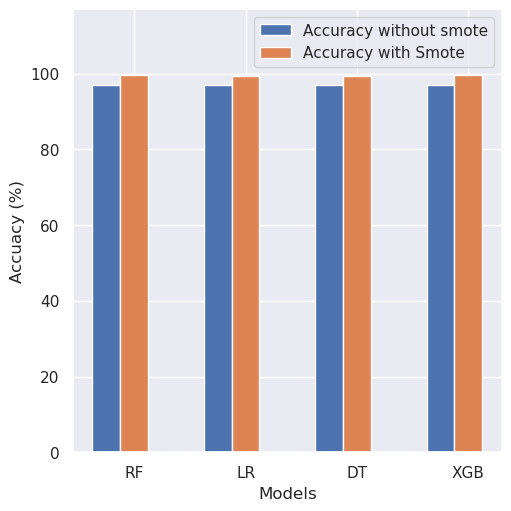

In [48]:
# accuracy comparision
# 

models = ("RF","LR", "DT", "XGB")

accuracy_values = {
    'Accuracy without smote': (rf_acc_gt*100, lr_acc_gt*100,  dt_acc_gt*100, xgb_acc_gt*100),
    'Accuracy with Smote': (srf_acc_gt*100, slr_acc_gt*100, sdt_acc_gt*100, sxgb_acc_gt*100)
}

print(accuracy_values)

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in accuracy_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuacy (%)')
ax.set_xlabel('Models')
ax.set_xticks(x + width, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 117)

plt.show()

{'Precision without smote': (100.0, 100.0, 100.0, 100.0), 'Precision with Smote': (100.0, 100.0, 100.0, 100.0)}


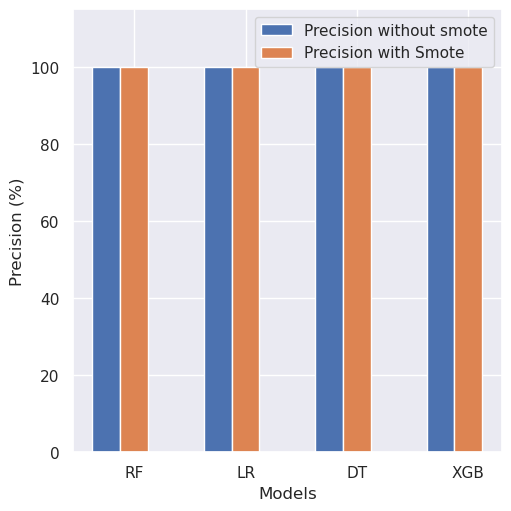

In [49]:
# precision comparision

models = ("RF","LR", "DT", "XGB")

precision_values = {
    'Precision without smote': (rf_precision_gt[0]*100, lr_precision_gt[0]*100,  dt_precision_gt[0]*100, xgb_precision_gt[0]*100),
    'Precision with Smote': (srf_precision_gt[0]*100, slr_precision_gt[0]*100, sdt_precision_gt[0]*100, sxgb_precision_gt[0]*100)
}

print(precision_values)

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in precision_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision (%)')
ax.set_xlabel('Models')
ax.set_xticks(x + width, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 115)

plt.show()

{'Recall without Smote': (100.0, 100.0, 100.0, 100.0), 'Recall with Smote': (100.0, 100.0, 100.0, 100.0)}


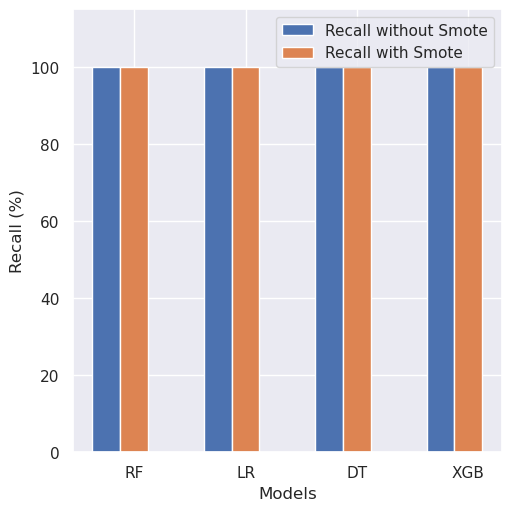

In [50]:
# recall comparision

models = ("RF", "LR", "DT", "XGB")

recall_values = {
    'Recall without Smote': (rf_recall_gt[0]*100, lr_recall_gt[0]*100, dt_recall_gt[0]*100, xgb_recall_gt[0]*100),
    'Recall with Smote': (srf_recall_gt[0]*100, slr_recall_gt[0]*100,  sdt_recall_gt[0]*100, sxgb_recall_gt[0]*100)
}

print(recall_values)

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in recall_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Recall (%)')
ax.set_xlabel('Models')
ax.set_xticks(x + width, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 115)

plt.show()


#### SRF

{'Accuracy without smote': (96.71052631578947, 98.02631578947368, 96.71052631578947, 98.02631578947368), 'Accuracy with Smote': (97.23756906077348, 96.68508287292818, 97.23756906077348, 97.23756906077348)}


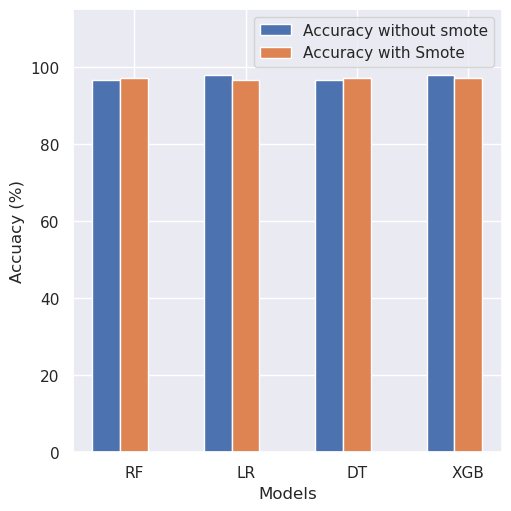

In [51]:
# accuracy comparision
# 

models = ("RF","LR", "DT", "XGB")

accuracy_values = {
    'Accuracy without smote': (rf_acc_srf*100, lr_acc_srf*100,  dt_acc_srf*100, xgb_acc_srf*100),
    'Accuracy with Smote': (srf_acc_srf*100, slr_acc_srf*100, sdt_acc_srf*100, sxgb_acc_srf*100)
}

print(accuracy_values)

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in accuracy_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuacy (%)')
ax.set_xlabel('Models')
ax.set_xticks(x + width, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 115)

plt.show()

{'Precision without smote': (92.06349206349206, 95.08196721311475, 92.06349206349206, 95.08196721311475), 'Precision with Smote': (100.0, 100.0, 100.0, 100.0)}


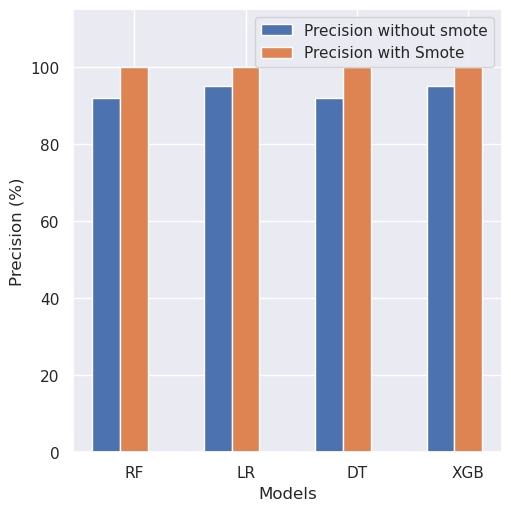

In [52]:
# precision comparision

models = ("RF","LR", "DT", "XGB")

precision_values = {
    'Precision without smote': (rf_precision_srf[0]*100, lr_precision_srf[0]*100,  dt_precision_srf[0]*100, xgb_precision_srf[0]*100),
    'Precision with Smote': (srf_precision_srf[0]*100, slr_precision_srf[0]*100, sdt_precision_srf[0]*100, sxgb_precision_srf[0]*100)
}

print(precision_values)

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in precision_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision (%)')
ax.set_xlabel('Models')
ax.set_xticks(x + width, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 115)

plt.show()

{'Recall without Smote': (100.0, 100.0, 100.0, 100.0), 'Recall with Smote': (94.73684210526315, 93.6842105263158, 94.73684210526315, 94.73684210526315)}


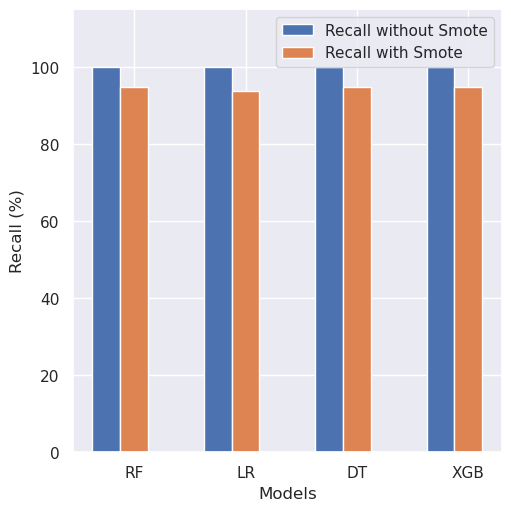

In [53]:
# recall comparision

models = ("RF", "LR", "DT", "XGB")

recall_values = {
    'Recall without Smote': (rf_recall_srf[0]*100, lr_recall_srf[0]*100, dt_recall_srf[0]*100, xgb_recall_srf[0]*100),
    'Recall with Smote': (srf_recall_srf[0]*100, slr_recall_srf[0]*100,  sdt_recall_srf[0]*100, sxgb_recall_srf[0]*100)
}

print(recall_values)

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in recall_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Recall (%)')
ax.set_xlabel('Models')
ax.set_xticks(x + width, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 115)

plt.show()

{'Accuracy': (96.71052631578947, 98.02631578947368, 96.71052631578947, 98.02631578947368), 'Recall': (100.0, 100.0, 100.0, 100.0), 'Precision': (92.06349206349206, 95.08196721311475, 92.06349206349206, 95.08196721311475)}


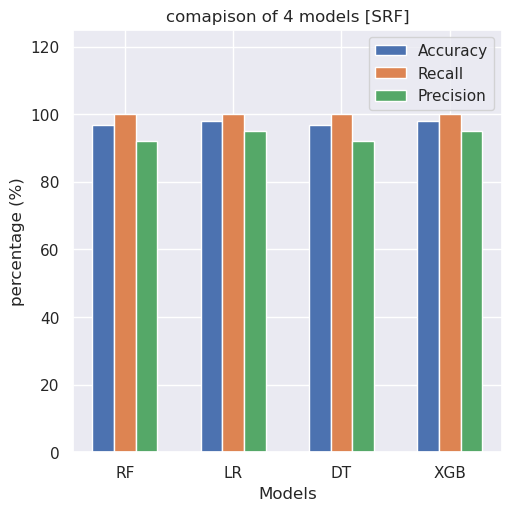

In [54]:
# ULTIMATE COMPARISON


models = ("RF", "LR", "DT", "XGB")

recall_values = {
    'Accuracy': (rf_acc_srf*100, lr_acc_srf*100,  dt_acc_srf*100, xgb_acc_srf*100),
    'Recall': (rf_recall_srf[0]*100, lr_recall_srf[0]*100, dt_recall_srf[0]*100, xgb_recall_srf[0]*100),
    'Precision': (rf_precision_srf[0]*100, lr_precision_srf[0]*100,  dt_precision_srf[0]*100, xgb_precision_srf[0]*100),
}

print(recall_values)

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in recall_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('comapison of 4 models [SRF]')
ax.set_ylabel('percentage (%)')
ax.set_xlabel('Models')
ax.set_xticks(x + width, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 125)

plt.show()

{'Accuracy': (97.23756906077348, 96.68508287292818, 97.23756906077348, 97.23756906077348), 'Recall': (94.73684210526315, 93.6842105263158, 94.73684210526315, 94.73684210526315), 'Precision': (100.0, 100.0, 100.0, 100.0)}


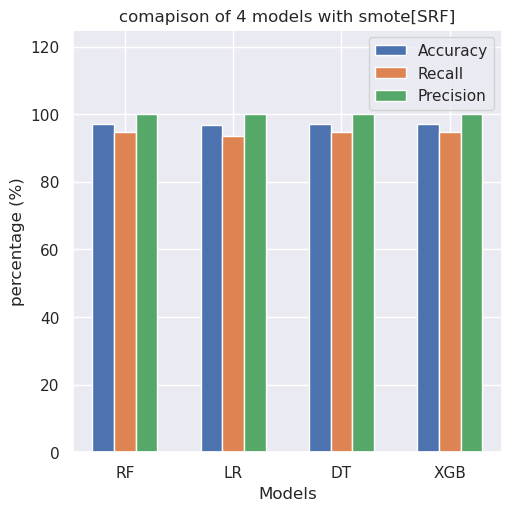

In [55]:
# ULTIMATE COMPARISON


models = ("RF", "LR", "DT", "XGB")

recall_values = {
    'Accuracy': (srf_acc_srf*100, slr_acc_srf*100,  sdt_acc_srf*100, sxgb_acc_srf*100),
    'Recall': (srf_recall_srf[0]*100, slr_recall_srf[0]*100, sdt_recall_srf[0]*100, sxgb_recall_srf[0]*100),
    'Precision': (srf_precision_srf[0]*100, slr_precision_srf[0]*100,  sdt_precision_srf[0]*100, sxgb_precision_srf[0]*100),
}

print(recall_values)

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in recall_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('comapison of 4 models with smote[SRF]')
ax.set_ylabel('percentage (%)')
ax.set_xlabel('Models')
ax.set_xticks(x + width, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 125)

plt.show()

{'Accuracy': (97.02970297029702, 97.02970297029702, 97.02970297029702, 97.02970297029702), 'Recall': (100.0, 100.0, 100.0, 100.0), 'Precision': (100.0, 100.0, 100.0, 100.0)}


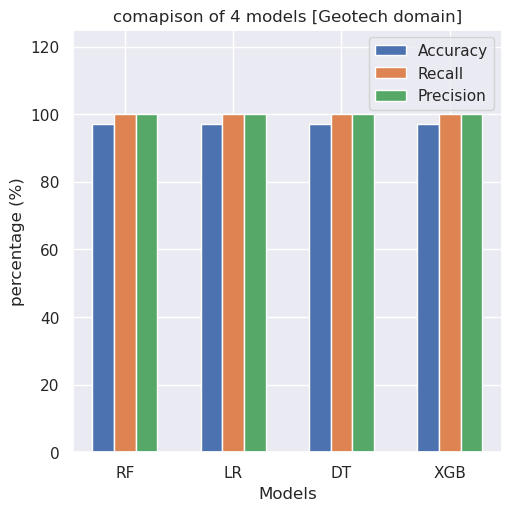

In [56]:
# ULTIMATE COMPARISON


models = ("RF", "LR", "DT", "XGB")

recall_values = {
    'Accuracy': (rf_acc_gt*100, lr_acc_gt*100,  dt_acc_gt*100, xgb_acc_gt*100),
    'Recall': (rf_recall_gt[0]*100, lr_recall_gt[0]*100, dt_recall_gt[0]*100, xgb_recall_gt[0]*100),
    'Precision': (rf_precision_gt[0]*100, lr_precision_gt[0]*100,  dt_precision_gt[0]*100, xgb_precision_gt[0]*100),
}

print(recall_values)

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in recall_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('comapison of 4 models [Geotech domain]')
ax.set_ylabel('percentage (%)')
ax.set_xlabel('Models')
ax.set_xticks(x + width, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 125)

plt.show()

{'Accuracy': (99.7005988023952, 99.40119760479041, 99.40119760479041, 99.7005988023952), 'Recall': (100.0, 100.0, 100.0, 100.0), 'Precision': (100.0, 100.0, 100.0, 100.0)}


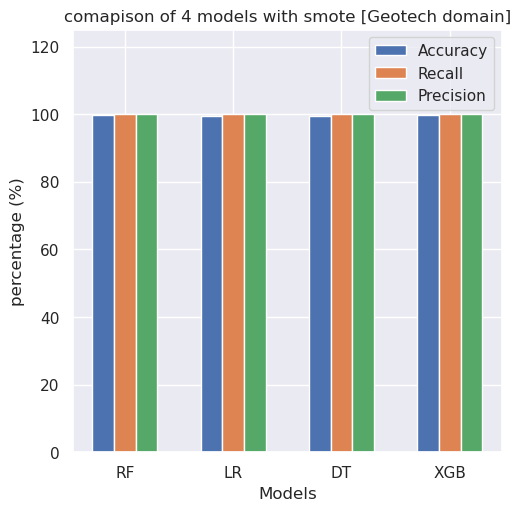

In [57]:
# ULTIMATE COMPARISON


models = ("RF", "LR", "DT", "XGB")

recall_values = {
    'Accuracy': (srf_acc_gt*100, slr_acc_gt*100,  sdt_acc_gt*100, sxgb_acc_gt*100),
    'Recall': (srf_recall_gt[0]*100, slr_recall_gt[0]*100, sdt_recall_gt[0]*100, sxgb_recall_gt[0]*100),
    'Precision': (srf_precision_gt[0]*100, slr_precision_gt[0]*100,  sdt_precision_gt[0]*100, sxgb_precision_gt[0]*100),
}

print(recall_values)

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in recall_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('comapison of 4 models with smote [Geotech domain]')
ax.set_ylabel('percentage (%)')
ax.set_xlabel('Models')
ax.set_xticks(x + width, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 125)

plt.show()

### classification models


accuracy: LR & XGB [LR]

precision: LR & XGB [RF & LR]

recall: all [LR]s
    


# Numerical [regression]

## Maximum unsupported span

{'MSE': (0.7892010644378514, 1.1623578976887008, 1.744276212327601, 2.362633820294155), 'MSE1': (0.8022591746157464, 1.2508836095682951, 1.4194219889505952, 2.735455078954629)}


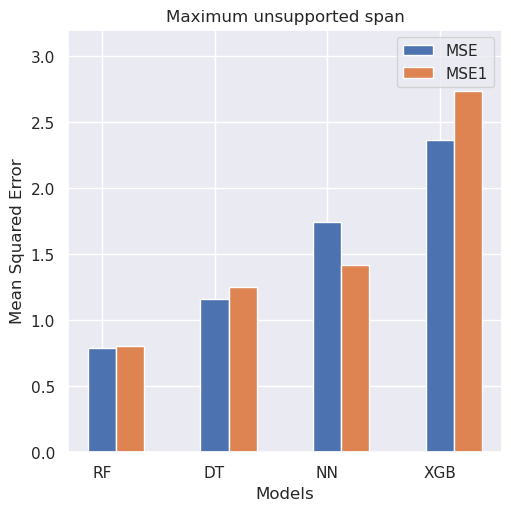

In [58]:
# MSE comparision

models = ("RF", "DT", "NN", "XGB")

mse_values = {
    'MSE': (RF_mse_mus, dt_mse_mus, NN_mse_mus, XGB_mse_mus),
    'MSE1': (RF_mse_mus1, dt_mse_mus1, NN_mse_mus1, XGB_mse_mus1),
}

print(mse_values)

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in mse_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Maximum unsupported span')
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Models')
ax.set_xticks(x, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 3.2)

plt.show()

{'R-squared': (0.9461984903692351, 0.9207595979721096, 0.8810889928245303, 0.8389342438012677), 'R-squared 1': (0.9453082913158467, 0.9147246125230557, 0.9032349939073621, 0.8135182282353701)}


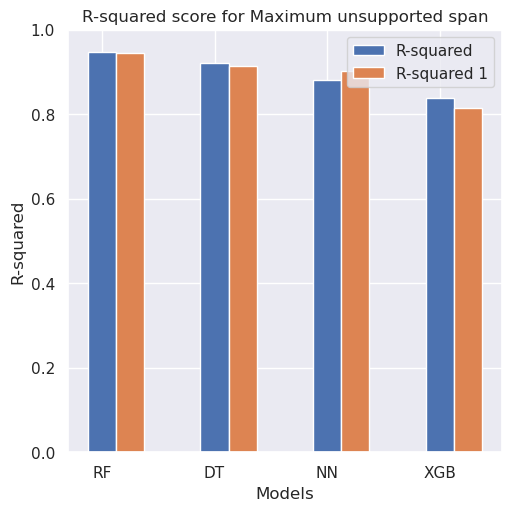

In [59]:
# R-Squared comparision

models = ("RF", "DT", "NN", "XGB")

r2_values = {
    'R-squared': (RF_r2_mus, dt_r2_mus, NN_r2_mus, XGB_r2_mus),
    'R-squared 1': (RF_r2_mus1, dt_r2_mus1, NN_r2_mus1, XGB_r2_mus1),
}

print(r2_values)

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in r2_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('R-squared score for Maximum unsupported span')
ax.set_ylabel('R-squared')
ax.set_xlabel('Models')
ax.set_xticks(x, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 1)

plt.show()

{'MSE': (0.7892010644378514, 1.1623578976887008, 1.744276212327601, 2.362633820294155), 'R-squared': (0.9461984903692351, 0.9207595979721096, 0.8810889928245303, 0.8389342438012677)}


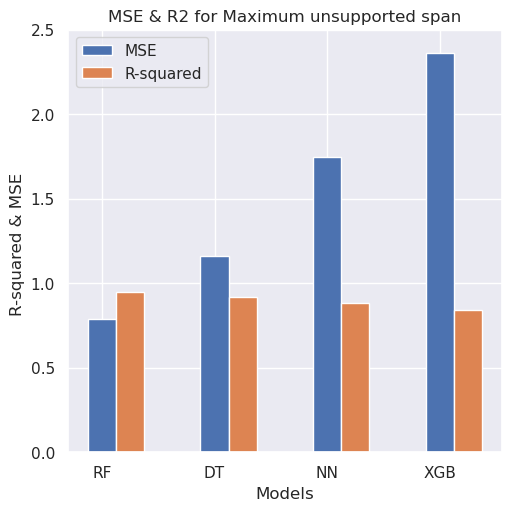

In [60]:
# comparison of mse and r2 for maximum unsupported span

# R-Squared comparision

models = ("RF", "DT", "NN", "XGB")

values = {
    'MSE': (RF_mse_mus, dt_mse_mus, NN_mse_mus, XGB_mse_mus),
    'R-squared': (RF_r2_mus, dt_r2_mus, NN_r2_mus, XGB_r2_mus),
    
}

print(values)

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('MSE & R2 for Maximum unsupported span')
ax.set_ylabel('R-squared & MSE ')
ax.set_xlabel('Models')
ax.set_xticks(x, models)
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, 2.5)

plt.show()

{'MSE': (0.8022591746157464, 1.2508836095682951, 1.4194219889505952, 2.735455078954629), 'R-squared': (0.9453082913158467, 0.9147246125230557, 0.9032349939073621, 0.8135182282353701)}


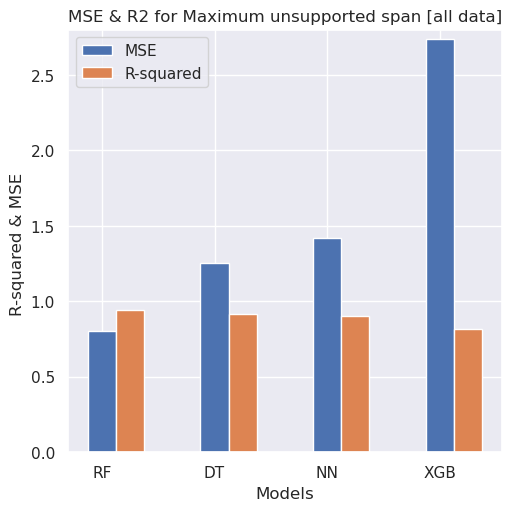

In [61]:
# comparison of mse and r2 for maximum unsupported span

# R-Squared comparision

models = ("RF", "DT", "NN", "XGB")

values = {
    'MSE': (RF_mse_mus1, dt_mse_mus1, NN_mse_mus1, XGB_mse_mus1),
    'R-squared': (RF_r2_mus1, dt_r2_mus1, NN_r2_mus1, XGB_r2_mus1),
    
}

print(values)

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('MSE & R2 for Maximum unsupported span [all data]')
ax.set_ylabel('R-squared & MSE ')
ax.set_xlabel('Models')
ax.set_xticks(x, models)
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, 2.8)

plt.show()

{'MSE all': (0.8022591746157464, 1.2508836095682951, 1.4194219889505952, 2.735455078954629), 'R-squared all': (0.9453082913158467, 0.9147246125230557, 0.9032349939073621, 0.8135182282353701), 'MSE few': (0.7892010644378514, 1.1623578976887008, 1.744276212327601, 2.362633820294155), 'R-squared few': (0.9461984903692351, 0.9207595979721096, 0.8810889928245303, 0.8389342438012677)}


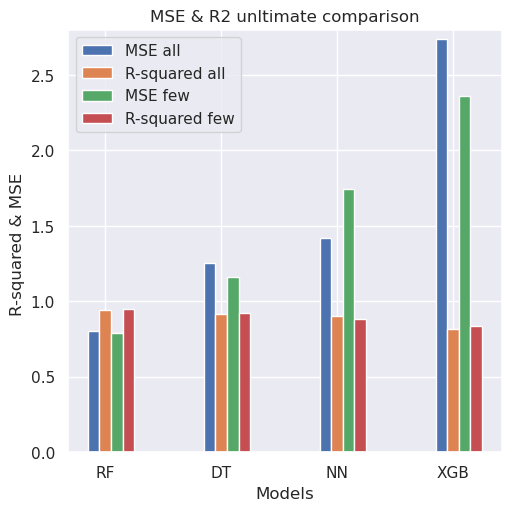

In [62]:
# comparison of mse and r2 for maximum unsupported span

# R-Squared comparision

models = ("RF", "DT", "NN", "XGB")

values = {
    'MSE all': (RF_mse_mus1, dt_mse_mus1, NN_mse_mus1, XGB_mse_mus1),
    'R-squared all': (RF_r2_mus1, dt_r2_mus1, NN_r2_mus1, XGB_r2_mus1),
    'MSE few': (RF_mse_mus, dt_mse_mus, NN_mse_mus, XGB_mse_mus),
    'R-squared few': (RF_r2_mus, dt_r2_mus, NN_r2_mus, XGB_r2_mus),
    
}

print(values)

x = np.arange(len(models))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('MSE & R2 unltimate comparison')
ax.set_ylabel('R-squared & MSE ')
ax.set_xlabel('Models')
ax.set_xticks(x+ width, models)
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, 2.8)

plt.show()

### Rock Quality Designation

{'MSE': (0.06773091493421057, 0.11676578947368424, 0.06105115771739221, 0.07736763022964045)}


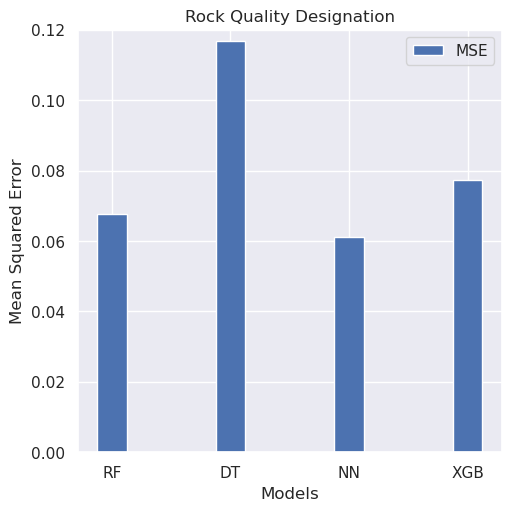

In [63]:
# mean squared error comparision

models = ("RF", "DT", "NN", "XGB")

mse_values = {
    'MSE': (rf_mse_rqd, dt_mse_rqd, NN_mse_rqd, xgb_mse_rqd)
}

print(mse_values)

# x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in mse_values.items():
    rects = ax.bar(x, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rock Quality Designation')
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Models')
ax.set_xticks(x, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 0.12)

plt.show()

{'R-Squared': (0.5544726663906892, 0.23192605781971454, 0.5984114560092457, 0.49108329575402654)}


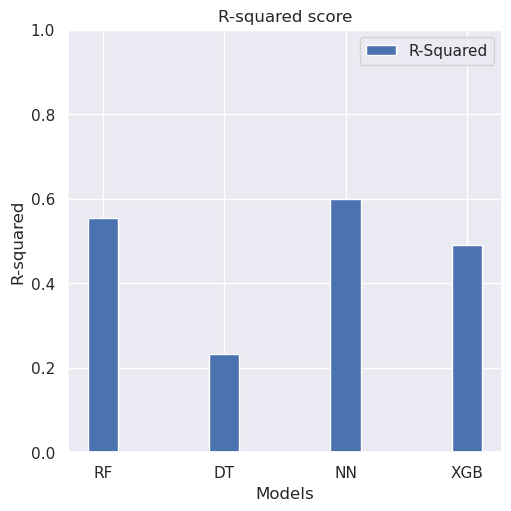

In [64]:
# recall comparision

models = ("RF", "DT", "NN", "XGB")

r2_values = {
    'R-Squared': (rf_r2_rqd, dt_r2_rqd, NN_r2_rqd, xgb_r2_rqd)
}

print(r2_values)

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in r2_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('R-squared score')
ax.set_ylabel('R-squared')
ax.set_xlabel('Models')
ax.set_xticks(x, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 1)

plt.show()

{'MSE': (0.06773091493421057, 0.11676578947368424, 0.06105115771739221, 0.07736763022964045), 'R2': (0.5544726663906892, 0.23192605781971454, 0.5984114560092457, 0.49108329575402654)}


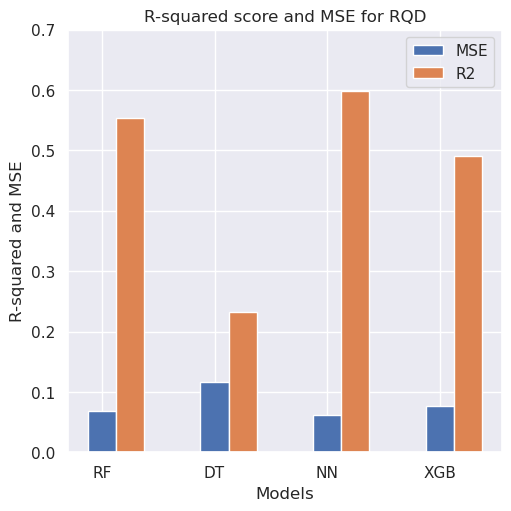

In [65]:
# combination of MSE and r2

# RQD comparision

models = ("RF", "DT", "NN", "XGB")

values = {
    'MSE': (rf_mse_rqd, dt_mse_rqd, NN_mse_rqd, xgb_mse_rqd),
    'R2': (rf_r2_rqd, dt_r2_rqd, NN_r2_rqd, xgb_r2_rqd)
}

print(values)

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('R-squared score and MSE for RQD')
ax.set_ylabel('R-squared and MSE')
ax.set_xlabel('Models')
ax.set_xticks(x, models)
ax.legend(loc='upper right', ncols=1)
ax.set_ylim(0, 0.7)

plt.show()

In [ ]:
# unlimate comparison of mse and r2 for maximum unsupported span

models = ("RF", "DT", "NN", "XGB")

values = {
    'MSE': (RF_mse_mus1, dt_mse_mus1, NN_mse_mus1, XGB_mse_mus1),
    'R-squared': (RF_r2_mus1, dt_r2_mus1, NN_r2_mus1, XGB_r2_mus1),
    
    
}

print(values)

x = np.arange(len(models))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('MSE & R2 unltimate comparison')
ax.set_ylabel('R-squared & MSE ')
ax.set_xlabel('Models')
ax.set_xticks(x+ width, models)
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, 2.8)

plt.show()

## MODEL SELECTION